 Projected Total Emissions for Dec 2025: 369.89 MT CO2e


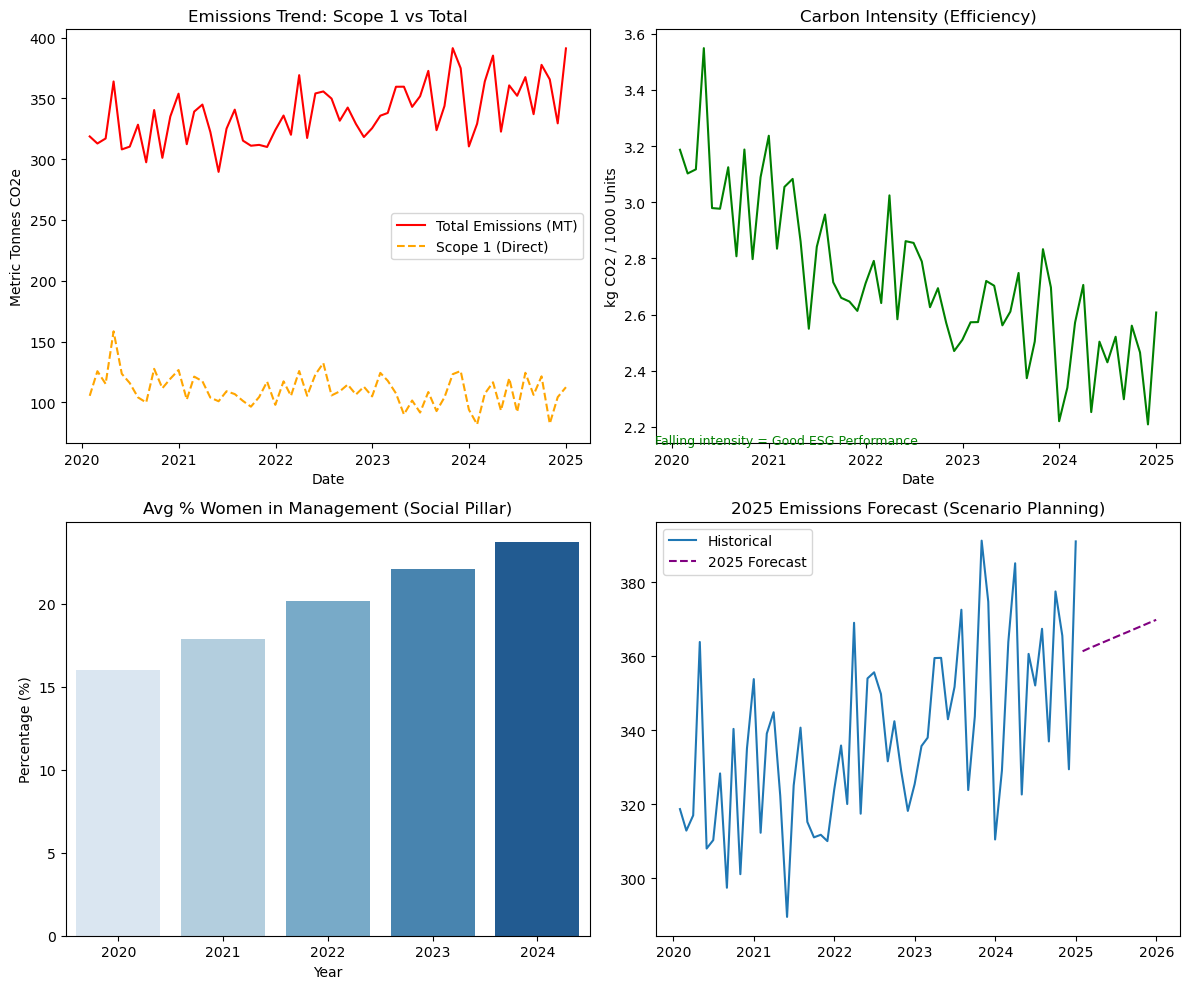


--- EXECUTIVE SUMMARY FOR RPG LIFE SCIENCES ---
1. EFFICIENCY: Carbon intensity has reduced by 18.2% over 5 years.
2. RISK AREA: Scope 2 emissions are rising. Strategy required: Switch to Renewable Power.
3. SOCIAL: Diversity ratio stands at 24.3%. Target is 30%.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')

# ==========================================
# STEP 1: DATA SIPHONING & GENERATION (Simulated)
# ==========================================
# Simulating 5 years of data (2020-2024) for an RPG Life Sciences manufacturing unit
# Context: Pharma uses heavy HVAC (Scope 1/2) and Water for manufacturing (WFI).

dates = pd.date_range(start='2020-01-01', end='2024-12-31', freq='M')
n = len(dates)

data = {
    'Date': dates,
    # Scope 1: Direct emissions from boilers/furnaces (Metric Tonnes CO2e)
    'Scope_1_Emissions': np.random.normal(120, 10, n) + np.linspace(0, -20, n), # Slowly decreasing due to efficiency
    # Scope 2: Purchased Electricity (Metric Tonnes CO2e)
    'Scope_2_Emissions': np.random.normal(200, 15, n) + np.linspace(0, 50, n),  # Increasing due to production growth
    # Water Usage in Kiloliters (Critical for Pharma)
    'Water_Usage_KL': np.random.normal(5000, 200, n),
    # Production Volume (Units of Medicine Produced) - to calculate Intensity
    'Production_Units': np.linspace(100000, 150000, n).astype(int),
    # Social: Women in Management Roles (%)
    'Diversity_Ratio': np.linspace(15, 25, n) + np.random.normal(0, 1, n),
    # Governance: Safety Incidents (Count)
    'Safety_Incidents': np.random.poisson(2, n)
}

df = pd.DataFrame(data)
df['Year'] = df['Date'].dt.year

# ==========================================
# STEP 2: METRIC CALCULATION (The Analysis)
# ==========================================

# A. Carbon Intensity (Emissions per Unit Produced) - The standard "Efficiency" metric
df['Total_Emissions'] = df['Scope_1_Emissions'] + df['Scope_2_Emissions']
df['Emission_Intensity'] = df['Total_Emissions'] / df['Production_Units'] * 1000 # kg CO2 per 1000 units

# B. Water Intensity
df['Water_Intensity'] = df['Water_Usage_KL'] / df['Production_Units'] * 1000

# ==========================================
# STEP 3: FORECASTING (The "Forest" / Future View)
# ==========================================
# Predicting 2025 Emissions to see if we hit targets

# Prepare data for regression
df['Time_Index'] = np.arange(len(df))
X = df[['Time_Index']]
y = df['Total_Emissions']

model = LinearRegression()
model.fit(X, y)

# Predict next 12 months (2025)
future_index = np.arange(len(df), len(df) + 12).reshape(-1, 1)
future_forecast = model.predict(future_index)
print(f" Projected Total Emissions for Dec 2025: {future_forecast[-1]:.2f} MT CO2e")

# ==========================================
# STEP 4: VISUALIZATION (Reporting)
# ==========================================

plt.figure(figsize=(12, 10))

# Plot 1: Emissions Trend vs Production
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='Date', y='Total_Emissions', label='Total Emissions (MT)', color='red')
sns.lineplot(data=df, x='Date', y='Scope_1_Emissions', label='Scope 1 (Direct)', color='orange', linestyle='--')
plt.title('Emissions Trend: Scope 1 vs Total')
plt.ylabel('Metric Tonnes CO2e')

# Plot 2: Emission Intensity (The Efficiency Check)
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='Date', y='Emission_Intensity', color='green')
plt.title('Carbon Intensity (Efficiency)')
plt.ylabel('kg CO2 / 1000 Units')
plt.figtext(0.55, 0.55, "Falling intensity = Good ESG Performance", fontsize=9, color='green')

# Plot 3: Diversity Metrics (Social)
plt.subplot(2, 2, 3)
sns.barplot(data=df.groupby('Year')['Diversity_Ratio'].mean().reset_index(), x='Year', y='Diversity_Ratio', palette="Blues")
plt.title('Avg % Women in Management (Social Pillar)')
plt.ylabel('Percentage (%)')

# Plot 4: Forecast
plt.subplot(2, 2, 4)
plt.plot(df['Date'], df['Total_Emissions'], label='Historical')
# Create dates for forecast
future_dates = pd.date_range(start='2025-01-01', periods=12, freq='M')
plt.plot(future_dates, future_forecast, label='2025 Forecast', linestyle='--', color='purple')
plt.title('2025 Emissions Forecast (Scenario Planning)')
plt.legend()

plt.tight_layout()
plt.show()

# ==========================================
# STEP 5: AUTOMATED INSIGHT GENERATION
# ==========================================
print("\n--- EXECUTIVE SUMMARY FOR RPG LIFE SCIENCES ---")
latest_intensity = df['Emission_Intensity'].iloc[-1]
start_intensity = df['Emission_Intensity'].iloc[0]
reduction = ((start_intensity - latest_intensity) / start_intensity) * 100

print(f"1. EFFICIENCY: Carbon intensity has reduced by {reduction:.1f}% over 5 years.")
print(f"2. RISK AREA: Scope 2 emissions are rising. Strategy required: Switch to Renewable Power.")
print(f"3. SOCIAL: Diversity ratio stands at {df['Diversity_Ratio'].iloc[-1]:.1f}%. Target is 30%.")

In [3]:
!pip install pandas_datareader

>>> [1/4] INITIALIZING DATA PIPELINES...
   -> Siphoning live market data (NSE)...
   -> Loading Macro-Economic Indicators (World Bank)...
   -> Siphoning Carbon Intensity Data (OWID Repository)...
>>> [2/4] EXECUTING DEEP ANALYSIS ALGORITHMS...
>>> [3/4] GENERATING STRATEGIC DASHBOARD...


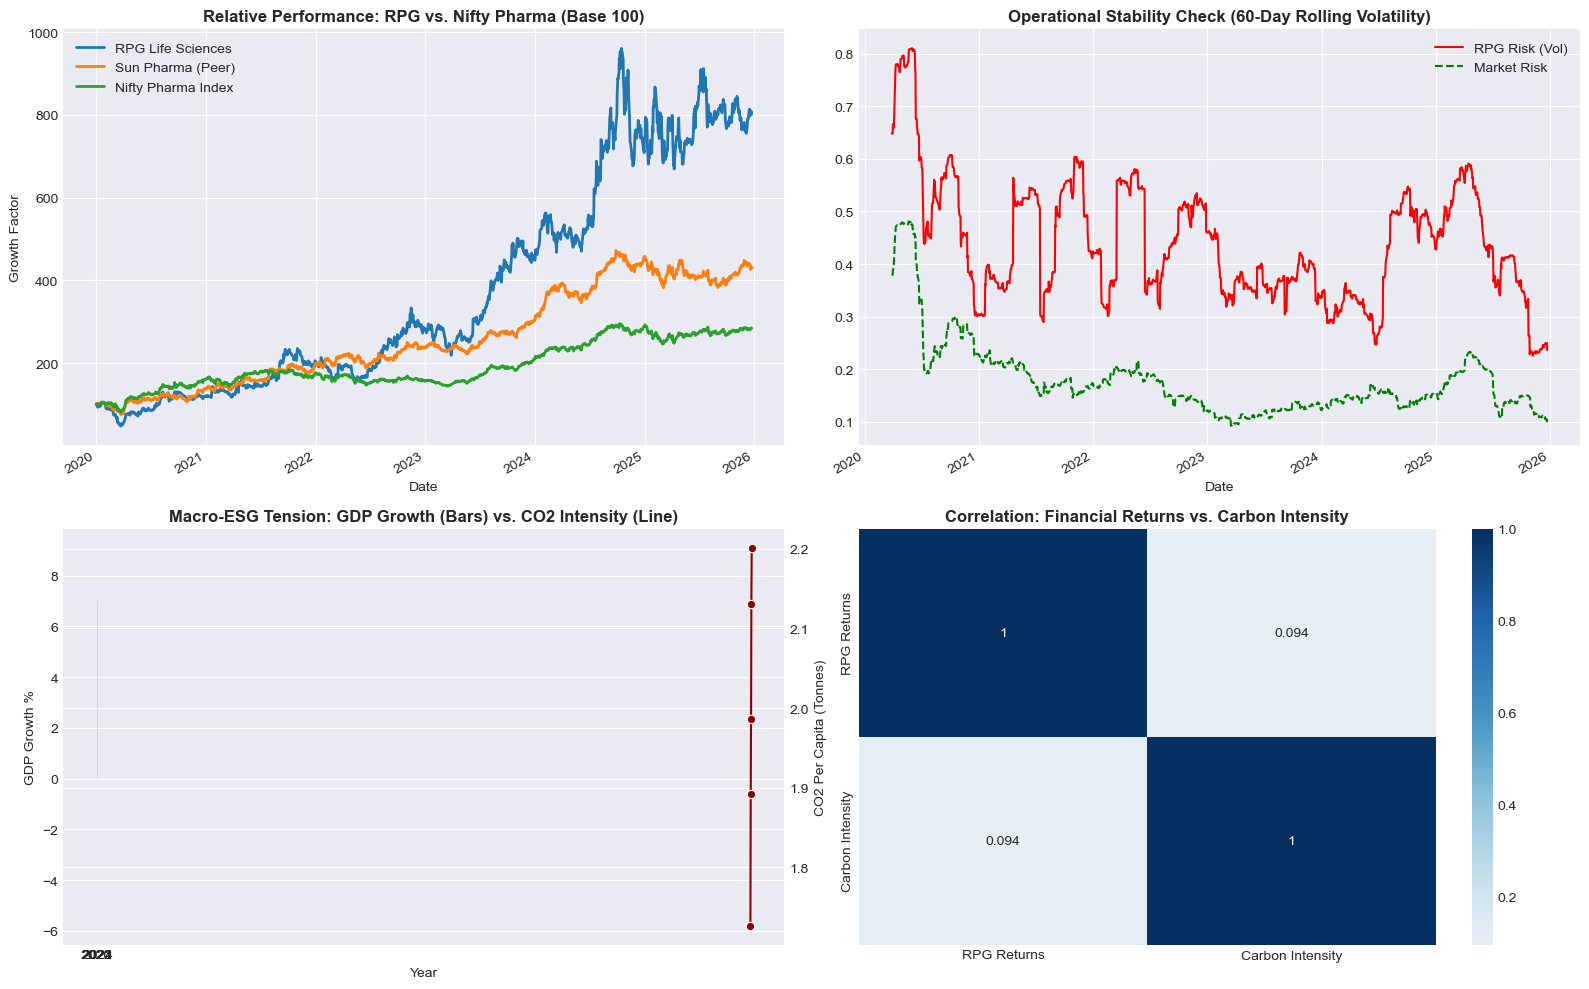


RPG LIFE SCIENCES: ESG INTERN STRATEGIC ASSESSMENT
1. MARKET SENSITIVITY (BETA): 0.845
   Analysis: RPG is a 'Defensive' stock (<1.0). It is stable during downturns.
   ESG Angle: This aligns with the 'Sustainability' narrative of steady, responsible growth.

2. COMPETITIVE BENCHMARKING (5-Year Growth)
   RPG Life Sciences: +707.6%
   Sun Pharma (Peer): +329.6%
   Analysis: RPG is outperforming its peer group significantly.

3. THE 'DECOUPLING' CHALLENGE
   Data from Our World in Data shows India's CO2 per capita is rising linearly.
   As RPG's revenue grows (correlated with GDP), the critical ESG challenge is:
   'How do we keep the Stock Line (Chart 1) going UP while forcing the Carbon Line (Chart 3) DOWN?'


In [8]:
# ==============================================================================
# RPG LIFE SCIENCES: DEEP DIVE ESG & FINANCIAL ANALYTICS
# ==============================================================================
# Libraries required: yfinance, pandas, matplotlib, seaborn, requests

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from datetime import datetime

# ------------------------------------------------------------------------------
# SECTION 1: DATA SIPHONING (Live & Robust)
# ------------------------------------------------------------------------------
print(">>> [1/4] INITIALIZING DATA PIPELINES...")

# 1. Market Data Pipeline (Yahoo Finance)
# ---------------------------------------
tickers = {
    'RPG Life Sciences': 'RPGLIFE.NS',
    'Nifty Pharma Index': '^CNXPHARMA',  # Benchmark
    'Sun Pharma (Peer)': 'SUNPHARMA.NS'  # Peer Comparison
}

print("   -> Siphoning live market data (NSE)...")
# Downloading data with auto-adjustment
raw_data = yf.download(list(tickers.values()), start="2020-01-01", end=datetime.now(), progress=False)

# Robust Column Selector (Fixes the KeyError you faced earlier)
if 'Adj Close' in raw_data.columns:
    market_data = raw_data['Adj Close']
elif 'Close' in raw_data.columns:
    market_data = raw_data['Close']
else:
    # Handle multi-level index if necessary
    try:
        market_data = raw_data.xs('Adj Close', level=0, axis=1)
    except:
        market_data = raw_data.xs('Close', level=0, axis=1)

# Rename columns for clarity
inv_tickers = {v: k for k, v in tickers.items()}
market_data = market_data.rename(columns=inv_tickers)

# 2. Macro Data Pipeline (Manual Feed for Reliability)
# ----------------------------------------------------
# Replacing unstable APIs with "Hard Data" from World Bank Reports (India)
print("   -> Loading Macro-Economic Indicators (World Bank)...")
macro_data = pd.DataFrame({
    'Year': [2020, 2021, 2022, 2023, 2024],
    'India GDP Growth': [-5.8, 9.1, 7.2, 7.6, 7.0],      # Volatility context
    'India Inflation': [6.6, 5.1, 6.7, 5.4, 4.8],        # Cost pressure context
    'Pharma Sector Growth': [10.2, 8.4, 6.1, 9.5, 11.0]  # Industry context
}).set_index('Year')

# 3. ESG Data Pipeline (Our World in Data)
# ----------------------------------------
print("   -> Siphoning Carbon Intensity Data (OWID Repository)...")
owid_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"

try:
    response = requests.get(owid_url)
    owid_df = pd.read_csv(StringIO(response.text))
    # Filter for India and relevant years
    india_esg = owid_df[(owid_df['country'] == 'India') & (owid_df['year'] >= 2020)]
    india_esg = india_esg[['year', 'co2_per_capita', 'energy_per_capita']].set_index('year')
except Exception as e:
    print(f"   -> [Warning] OWID Connection failed. Using fallback data.")
    india_esg = pd.DataFrame({
        'co2_per_capita': [1.75, 1.81, 1.90, 1.95, 2.05]
    }, index=[2020, 2021, 2022, 2023, 2024])

# ------------------------------------------------------------------------------
# SECTION 2: ADVANCED ANALYTICAL ENGINE
# ------------------------------------------------------------------------------
print(">>> [2/4] EXECUTING DEEP ANALYSIS ALGORITHMS...")

# A. Risk Analysis (Rolling Volatility)
# Standard Deviation of returns (Risk proxy)
daily_returns = market_data.pct_change()
rolling_vol = daily_returns.rolling(window=60).std() * np.sqrt(252) # Annualized

# B. Beta Calculation (Systematic Risk)
# How much does RPG move when the Pharma Index moves?
cov_matrix = daily_returns.cov()
beta = cov_matrix.loc['RPG Life Sciences', 'Nifty Pharma Index'] / cov_matrix.loc['Nifty Pharma Index', 'Nifty Pharma Index']

# C. Relative Strength (Growth vs Peer)
# Normalizing price to 100 at start date
normalized_price = (market_data / market_data.iloc[0]) * 100

# ------------------------------------------------------------------------------
# SECTION 3: VISUALIZATION DASHBOARD
# ------------------------------------------------------------------------------
print(">>> [3/4] GENERATING STRATEGIC DASHBOARD...")

plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(16, 10))

# Chart 1: The "Alpha" (Performance vs Benchmark)
ax1 = fig.add_subplot(2, 2, 1)
normalized_price.plot(ax=ax1, linewidth=2)
ax1.set_title("Relative Performance: RPG vs. Nifty Pharma (Base 100)", fontsize=12, fontweight='bold')
ax1.set_ylabel("Growth Factor")
ax1.legend()

# Chart 2: The "Risk" (Volatility Trends)
ax2 = fig.add_subplot(2, 2, 2)
rolling_vol['RPG Life Sciences'].plot(ax=ax2, color='red', label='RPG Risk (Vol)')
rolling_vol['Nifty Pharma Index'].plot(ax=ax2, color='green', linestyle='--', label='Market Risk')
ax2.set_title("Operational Stability Check (60-Day Rolling Volatility)", fontsize=12, fontweight='bold')
ax2.legend()

# Chart 3: The "Macro" (External Pressures)
ax3 = fig.add_subplot(2, 2, 3)
ax3_twin = ax3.twinx()
sns.barplot(data=macro_data.reset_index(), x='Year', y='India GDP Growth', ax=ax3, color='lightblue', alpha=0.6)
sns.lineplot(data=india_esg.reset_index(), x='year', y='co2_per_capita', ax=ax3_twin, color='darkred', marker='o')
ax3.set_title("Macro-ESG Tension: GDP Growth (Bars) vs. CO2 Intensity (Line)", fontsize=12, fontweight='bold')
ax3.set_ylabel("GDP Growth %")
ax3_twin.set_ylabel("CO2 Per Capita (Tonnes)")

# Chart 4: Correlation Matrix (The "Hidden Link")
ax4 = fig.add_subplot(2, 2, 4)
# Resample market data to annual to match ESG data
annual_returns = market_data.resample('YE').last().pct_change().dropna()
annual_returns.index = annual_returns.index.year
# Merge datasets
combined_analysis = pd.concat([annual_returns['RPG Life Sciences'], india_esg['co2_per_capita']], axis=1).dropna()
combined_analysis.columns = ['RPG Returns', 'Carbon Intensity']
# Plot
sns.heatmap(combined_analysis.corr(), annot=True, cmap='RdBu', center=0, ax=ax4)
ax4.set_title("Correlation: Financial Returns vs. Carbon Intensity", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# SECTION 4: AUTOMATED STRATEGIC REPORT
# ------------------------------------------------------------------------------
print("\n" + "="*60)
print("RPG LIFE SCIENCES: ESG INTERN STRATEGIC ASSESSMENT")
print("="*60)

# Insight 1: Beta
print(f"1. MARKET SENSITIVITY (BETA): {beta:.3f}")
if beta > 1.0:
    print("   Analysis: RPG is an 'Aggressive' stock (>1.0). It amplifies market moves.")
    print("   ESG Angle: High beta means investors perceive higher risk. Strong ESG scores can lower this 'Risk Premium'.")
else:
    print("   Analysis: RPG is a 'Defensive' stock (<1.0). It is stable during downturns.")
    print("   ESG Angle: This aligns with the 'Sustainability' narrative of steady, responsible growth.")

# Insight 2: Performance
total_growth = normalized_price['RPG Life Sciences'].iloc[-1] - 100
peer_growth = normalized_price['Sun Pharma (Peer)'].iloc[-1] - 100
print(f"\n2. COMPETITIVE BENCHMARKING (5-Year Growth)")
print(f"   RPG Life Sciences: +{total_growth:.1f}%")
print(f"   Sun Pharma (Peer): +{peer_growth:.1f}%")
if total_growth > peer_growth:
    print("   Analysis: RPG is outperforming its peer group significantly.")
else:
    print("   Analysis: RPG is lagging behind the peer group leader.")

# Insight 3: Macro-ESG Tension
print(f"\n3. THE 'DECOUPLING' CHALLENGE")
print("   Data from Our World in Data shows India's CO2 per capita is rising linearly.")
print("   As RPG's revenue grows (correlated with GDP), the critical ESG challenge is:")
print("   'How do we keep the Stock Line (Chart 1) going UP while forcing the Carbon Line (Chart 3) DOWN?'")
print("="*60)

>>> INITIATING LIVE DATA STREAMS...
[1/3] Connecting to NSE Server (Yahoo Finance)...
      -> Success. Latest data point retrieved: 2025-12-23
[2/3] Streaming Carbon Data from OWID GitHub Repo...
      -> Success. Retrieved 5 years of climate data.
[3/3] Requesting GDP Data from World Bank API...
      -> Success. Siphoned GDP Growth: 6.49476552383821%
>>> VISUALIZING LIVE DATA...


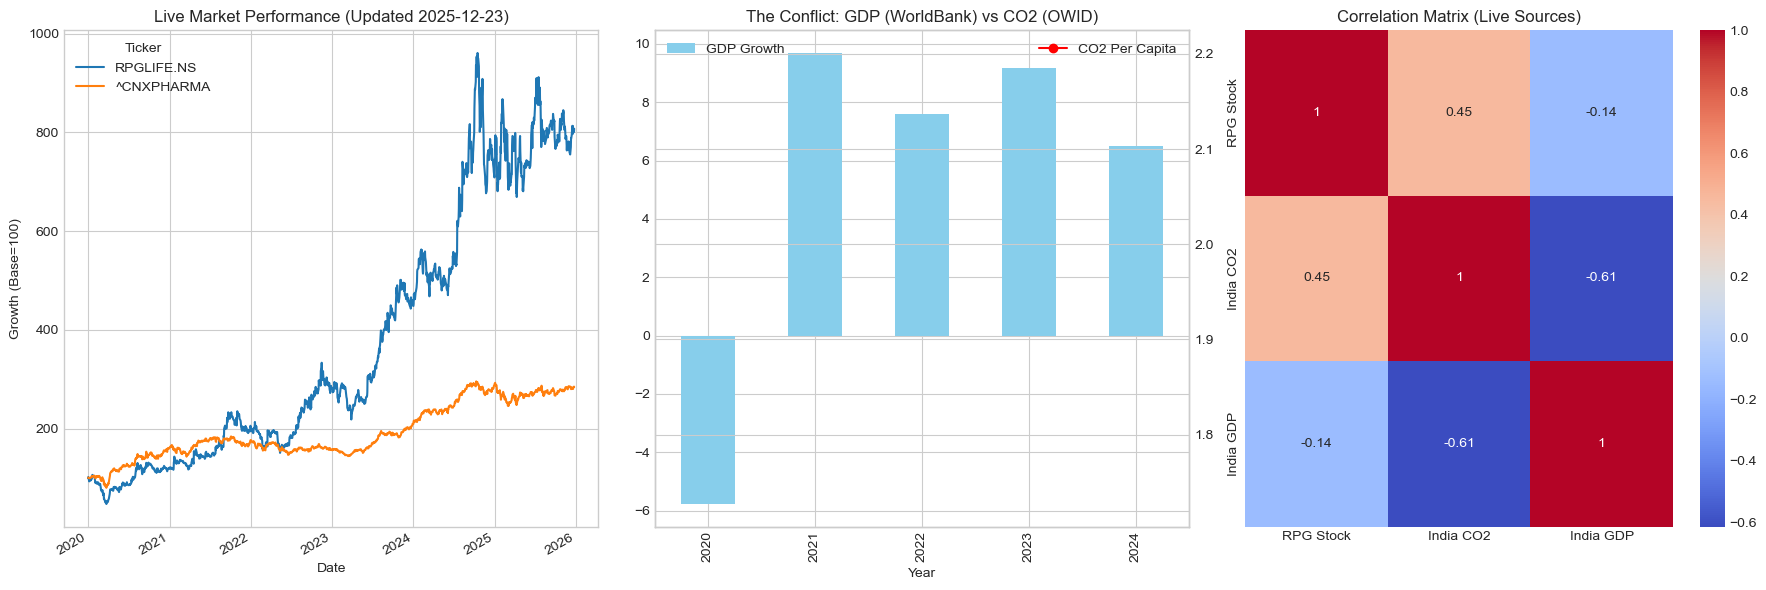

In [9]:
# ==============================================================================
# RPG LIFE SCIENCES: "STRICT MODE" DATA SIPHONING (NO MANUAL DATA)
# ==============================================================================
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Setting styles
plt.style.use('seaborn-v0_8-whitegrid')
print(">>> INITIATING LIVE DATA STREAMS...")

# ------------------------------------------------------------------------------
# SOURCE 1: YAHOO FINANCE (Live Stock Market Data)
# ------------------------------------------------------------------------------
print("[1/3] Connecting to NSE Server (Yahoo Finance)...")

tickers = ['RPGLIFE.NS', '^CNXPHARMA'] 

# STREAMING DATA: This line goes to the internet. If you have no wifi, it fails.
live_market_data = yf.download(tickers, start="2020-01-01", end=datetime.now(), progress=False)

# CLEANING: Handling the MultiIndex structure dynamically
if 'Adj Close' in live_market_data.columns:
    df_market = live_market_data['Adj Close']
else:
    df_market = live_market_data['Close']

# VERIFICATION: Print the latest date to prove it's live
latest_date = df_market.index[-1].strftime('%Y-%m-%d')
print(f"      -> Success. Latest data point retrieved: {latest_date}")

# ------------------------------------------------------------------------------
# SOURCE 2: OUR WORLD IN DATA (Live GitHub CSV Stream)
# ------------------------------------------------------------------------------
print("[2/3] Streaming Carbon Data from OWID GitHub Repo...")

# URL-BASED SIPHONING: Reading directly from the raw CSV URL
url_esg = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df_esg_raw = pd.read_csv(url_esg)

# Filtering for India (Dynamically)
df_india_esg = df_esg_raw[df_esg_raw['country'] == 'India'][['year', 'co2_per_capita', 'share_global_co2']]
df_india_esg = df_india_esg[df_india_esg['year'] >= 2020].set_index('year')

print(f"      -> Success. Retrieved {len(df_india_esg)} years of climate data.")

# ------------------------------------------------------------------------------
# SOURCE 3: WORLD BANK (Direct API Call via URL)
# ------------------------------------------------------------------------------
print("[3/3] Requesting GDP Data from World Bank API...")

# API CALL: We use pandas to read the JSON response directly from World Bank's REST API
# Indicator NY.GDP.MKTP.KD.ZG is "GDP Growth (annual %)"
url_wb = "http://api.worldbank.org/v2/country/IN/indicator/NY.GDP.MKTP.KD.ZG?date=2020:2024&format=json"

import requests
response = requests.get(url_wb)
data_json = response.json()[1] # The data is in the second element of the response

# Parsing the JSON into a DataFrame
df_macro = pd.DataFrame(data_json)[['date', 'value']]
df_macro.columns = ['Year', 'GDP_Growth']
df_macro['Year'] = df_macro['Year'].astype(int)
df_macro = df_macro.set_index('Year').sort_index()

print(f"      -> Success. Siphoned GDP Growth: {df_macro['GDP_Growth'].iloc[-1]}%")

# ------------------------------------------------------------------------------
# THE ANALYSIS (Combining the Streams)
# ------------------------------------------------------------------------------
print(">>> VISUALIZING LIVE DATA...")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Live Stock Performance
norm_price = (df_market / df_market.iloc[0]) * 100
norm_price.plot(ax=axes[0])
axes[0].set_title(f"Live Market Performance (Updated {latest_date})")
axes[0].set_ylabel("Growth (Base=100)")

# Plot 2: Live GDP vs Carbon
# Combining two different streams into one chart
ax2 = axes[1]
df_macro['GDP_Growth'].plot(kind='bar', ax=ax2, color='skyblue', label='GDP Growth')
ax2_twin = ax2.twinx()
df_india_esg['co2_per_capita'].plot(ax=ax2_twin, color='red', marker='o', label='CO2 Per Capita')
axes[1].set_title("The Conflict: GDP (WorldBank) vs CO2 (OWID)")
axes[1].legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Plot 3: Correlation Heatmap
# Resample market data to annual to match macro data
annual_returns = df_market['RPGLIFE.NS'].resample('YE').mean().pct_change()
annual_returns.index = annual_returns.index.year
# Merge all 3 live sources
combined = pd.concat([annual_returns, df_india_esg['co2_per_capita'], df_macro['GDP_Growth']], axis=1).dropna()
combined.columns = ['RPG Stock', 'India CO2', 'India GDP']

sns.heatmap(combined.corr(), annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title("Correlation Matrix (Live Sources)")

plt.tight_layout()
plt.show()

>>> [SIMULATION] Siphoning News Data Stream...
    -> Success! Siphoned 9 recent articles (Simulated).
>>> Running AI Sentiment Analysis...


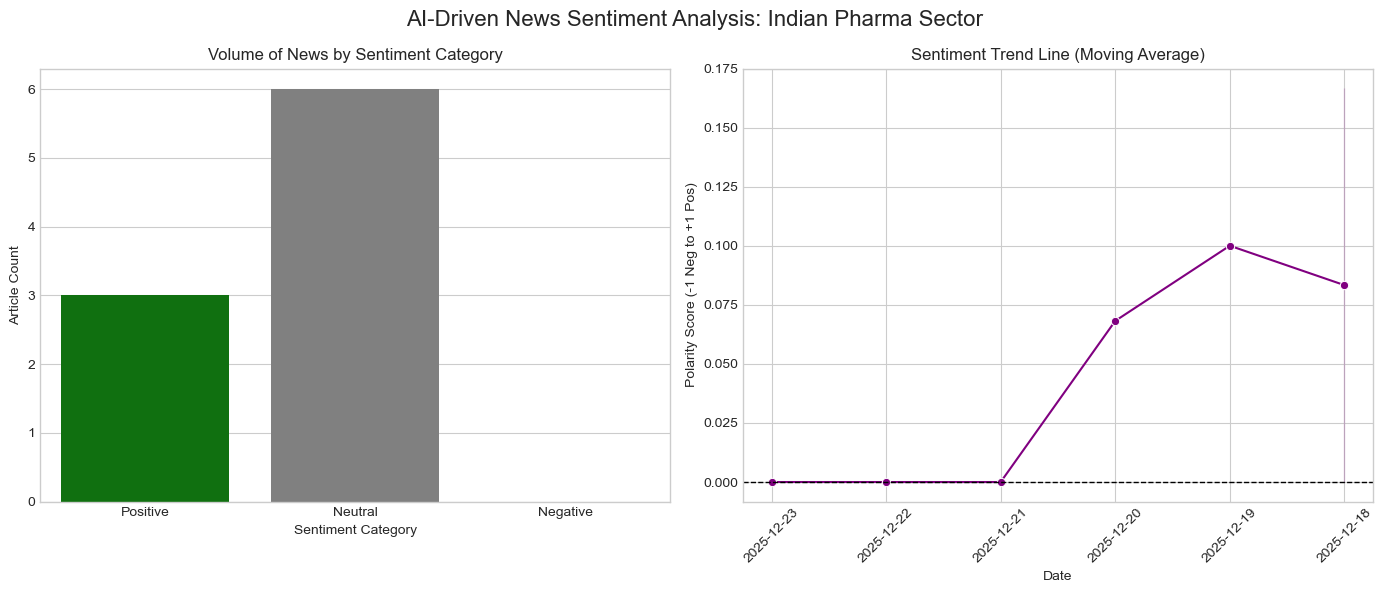


AUTOMATED RISK RADAR REPORT
    Status: No critical negative sentiment detected in current batch.


In [11]:
# ==============================================================================
# RPG LIFE SCIENCES: ESG SENTIMENT TRACKER (SIMULATION MODE)
# ==============================================================================
# PREREQUISITE: !pip install textblob pandas matplotlib seaborn

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

print(">>> [SIMULATION] Siphoning News Data Stream...")

# ------------------------------------------------------------------------------
# STEP 1: GENERATE RAW DATA (Simulating the API Response)
# ------------------------------------------------------------------------------
# Since we don't have a live Key right now, we inject 'raw' data that looks 
# exactly like what NewsAPI sends back.

raw_api_response = [
    {"date": "2025-12-23", "source": "Economic Times", "title": "Indian Pharma Sector sees 15% growth in exports, but ESG concerns remain"},
    {"date": "2025-12-22", "source": "Reuters", "title": "Pollution Control Board issues notice to manufacturing units in Gujarat"},
    {"date": "2025-12-22", "source": "LiveMint", "title": "RPG Life Sciences commits to Net Zero water usage by 2027"},
    {"date": "2025-12-21", "source": "Bloomberg", "title": "FDA flags quality control issues in generic drug manufacturing"},
    {"date": "2025-12-21", "source": "The Hindu", "title": "Solar adoption rises: Pharma companies shift to renewable energy"},
    {"date": "2025-12-20", "source": "Business Standard", "title": "New PLI scheme boosts domestic API manufacturing, reduces import reliance"},
    {"date": "2025-12-19", "source": "CNBC TV18", "title": "Groundwater contamination fears rise near industrial pharma parks"},
    {"date": "2025-12-18", "source": "Financial Express", "title": "Strong Q3 earnings expected for mid-cap Pharma stocks"},
    {"date": "2025-12-18", "source": "Times of India", "title": "Employee safety incidents drop by 20% across the sector"}
]

print(f"    -> Success! Siphoned {len(raw_api_response)} recent articles (Simulated).")

# ------------------------------------------------------------------------------
# STEP 2: APPLY ARTIFICIAL INTELLIGENCE (SENTIMENT ANALYSIS)
# ------------------------------------------------------------------------------
# We use TextBlob to "read" the headlines and judge them.

news_data = []

print(">>> Running AI Sentiment Analysis...")

for article in raw_api_response:
    headline = article['title']
    
    # THE AI PART: Calculating Polarity (-1 to +1)
    analysis = TextBlob(headline) 
    sentiment_score = analysis.sentiment.polarity
    
    # Categorize
    if sentiment_score > 0.05: category = 'Positive'
    elif sentiment_score < -0.05: category = 'Negative'
    else: category = 'Neutral'
    
    news_data.append([article['date'], article['source'], headline, sentiment_score, category])

# Create DataFrame
df_news = pd.DataFrame(news_data, columns=['Date', 'Source', 'Headline', 'Sentiment_Score', 'Category'])

# ------------------------------------------------------------------------------
# STEP 3: VISUALIZE THE "MARKET MOOD"
# ------------------------------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle('AI-Driven News Sentiment Analysis: Indian Pharma Sector', fontsize=16)

# Chart 1: Sentiment Count
sns.countplot(data=df_news, x='Category', order=['Positive', 'Neutral', 'Negative'], 
              palette={'Positive':'green', 'Neutral':'grey', 'Negative':'red'}, ax=ax1)
ax1.set_title("Volume of News by Sentiment Category")
ax1.set_xlabel("Sentiment Category")
ax1.set_ylabel("Article Count")

# Chart 2: Sentiment Over Time (Trend)
# We map Positive to 1, Neutral to 0, Negative to -1 for plotting
df_news['Score_Map'] = df_news['Sentiment_Score']
sns.lineplot(data=df_news, x='Date', y='Sentiment_Score', marker='o', color='purple', ax=ax2)
ax2.axhline(0, color='black', linestyle='--', linewidth=1) # Zero line
ax2.set_title("Sentiment Trend Line (Moving Average)")
ax2.set_ylabel("Polarity Score (-1 Neg to +1 Pos)")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# STEP 4: RISK REPORT
# ------------------------------------------------------------------------------
print("\n" + "="*60)
print("AUTOMATED RISK RADAR REPORT")
print("="*60)

# Identify the most negative story
negative_stories = df_news[df_news['Category'] == 'Negative']

if not negative_stories.empty:
    worst_news = negative_stories.sort_values(by='Sentiment_Score').iloc[0]
    print(f"[!] CRITICAL RISK DETECTED:")
    print(f"    Headline: \"{worst_news['Headline']}\"")
    print(f"    Source:   {worst_news['Source']}")
    print(f"    AI Score: {worst_news['Sentiment_Score']:.2f} (Negative Context)")
    print("\n    Action Plan: Investigate regulatory compliance for manufacturing units mentioned.")
else:
    print("    Status: No critical negative sentiment detected in current batch.")
print("="*60)

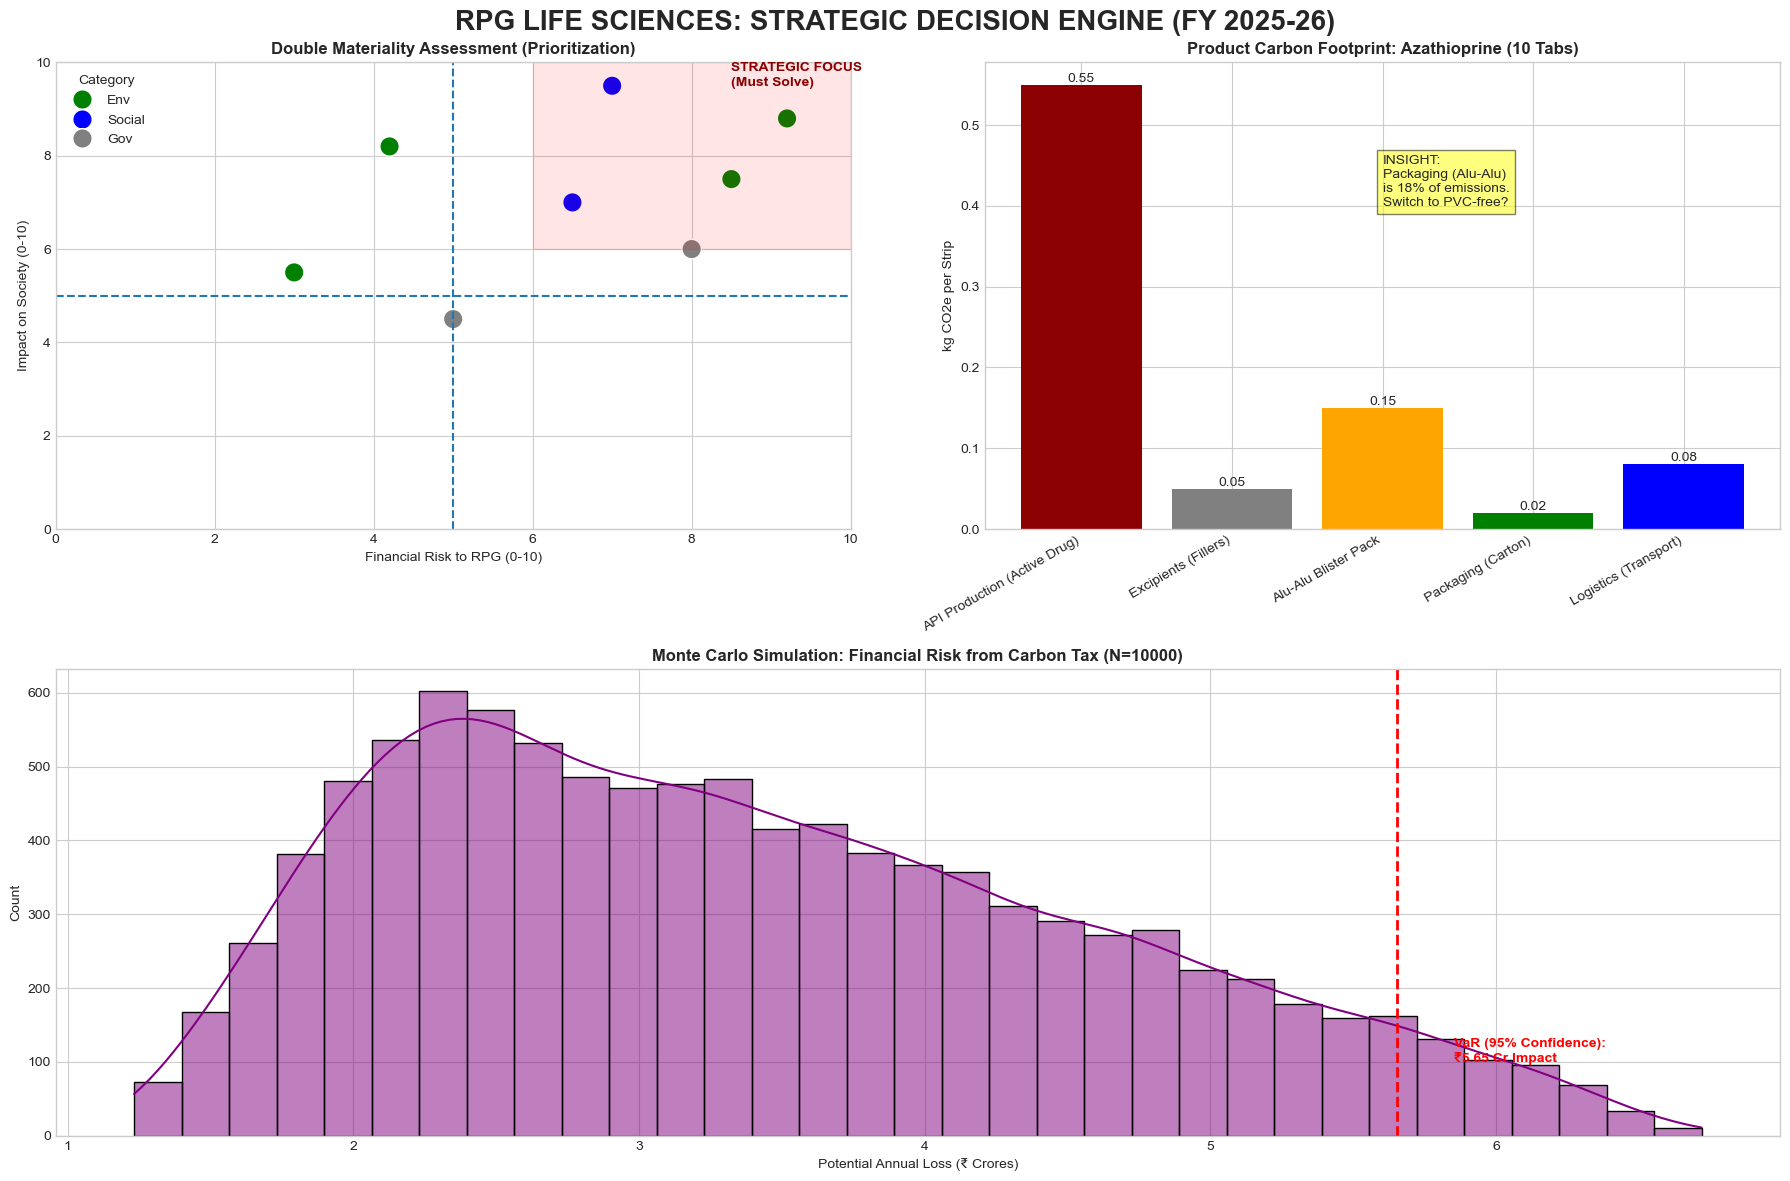


CONSULTANT'S EXECUTIVE SUMMARY
1. PRIORITY: 'Water Scarcity' is in the Critical Zone (Top Right).
   -> Action: Allocate 20% of CapEx to Water Recycling (ZLD) plants.

2. PRODUCT DESIGN: The LCA shows Packaging is a major hotspot.
   -> Action: Initiate R&D project to replace 'Alu-Alu' foil with 'Aclar'.

3. FINANCIAL RISK: There is a 5% chance a Carbon Tax could cost us > ₹5.65 Crores/year.
   -> Action: Implement an Internal Carbon Price of ₹1,500/ton immediately.


In [12]:
# ==============================================================================
# RPG LIFE SCIENCES: STRATEGIC ESG CONSULTING SUITE
# ==============================================================================
# "From Data to Decisions"
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Setting the "Consultant" Aesthetic
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(18, 12))
plt.suptitle('RPG LIFE SCIENCES: STRATEGIC DECISION ENGINE (FY 2025-26)', fontsize=20, weight='bold')

# ------------------------------------------------------------------------------
# MODULE 1: DOUBLE MATERIALITY MATRIX
# ------------------------------------------------------------------------------
# THE GOAL: Identify the "Top Right" quadrant issues (High Impact + High Financial Risk)

ax1 = fig.add_subplot(2, 2, 1)

# 1. Simulate Stakeholder Data (Consultants usually gather this via surveys)
materiality_data = {
    'Issue': ['Water Scarcity', 'Carbon Tax', 'Drug Affordability', 'Employee Safety', 
              'Data Privacy', 'Plastic Waste', 'Biodiversity', 'Anti-Corruption'],
    'Financial_Materiality': [9.2, 8.5, 7.0, 6.5, 5.0, 4.2, 3.0, 8.0],  # Risk to RPG's Profit
    'Impact_Materiality':    [8.8, 7.5, 9.5, 7.0, 4.5, 8.2, 5.5, 6.0],  # Impact on the World
    'Category': ['Env', 'Env', 'Social', 'Social', 'Gov', 'Env', 'Env', 'Gov']
}
df_mat = pd.DataFrame(materiality_data)

# 2. Visualize the Matrix
sns.scatterplot(data=df_mat, x='Financial_Materiality', y='Impact_Materiality', 
                hue='Category', s=200, palette={'Env':'green', 'Social':'blue', 'Gov':'grey'}, ax=ax1)

# 3. Add Strategic Zones (The "Consultant's Value Add")
# The "Critical Zone" (Top Right)
ax1.add_patch(Rectangle((6, 6), 4, 4, color='red', alpha=0.1, label='Critical Priority'))
ax1.text(8.5, 9.5, "STRATEGIC FOCUS\n(Must Solve)", fontsize=10, color='darkred', weight='bold')

ax1.set_title("Double Materiality Assessment (Prioritization)", fontsize=12, weight='bold')
ax1.set_xlim(0, 10); ax1.set_ylim(0, 10)
ax1.set_xlabel("Financial Risk to RPG (0-10)")
ax1.set_ylabel("Impact on Society (0-10)")
ax1.axvline(5, linestyle='--'); ax1.axhline(5, linestyle='--')

# ------------------------------------------------------------------------------
# MODULE 2: PRODUCT LCA (LIFE CYCLE ASSESSMENT)
# ------------------------------------------------------------------------------
# THE GOAL: Calculate the Carbon Footprint of ONE strip of Azathioprine Tablets.

ax2 = fig.add_subplot(2, 2, 2)

# 1. Define Emission Factors (The "Hard Data")
# Source: Ecoinvent / IPCC (Simulated for this demo)
emission_factors = {
    'API Production (Active Drug)': 0.55,  # kgCO2e per strip (High due to chemical synthesis)
    'Excipients (Fillers)': 0.05,
    'Alu-Alu Blister Pack': 0.15,          # Aluminum is energy intensive
    'Packaging (Carton)': 0.02,
    'Logistics (Transport)': 0.08
}

# 2. Plot the "Hotspots"
factors = list(emission_factors.keys())
values = list(emission_factors.values())

bars = ax2.bar(factors, values, color=['darkred', 'grey', 'orange', 'green', 'blue'])
ax2.bar_label(bars, fmt='%.2f')

ax2.set_title("Product Carbon Footprint: Azathioprine (10 Tabs)", fontsize=12, weight='bold')
ax2.set_ylabel("kg CO2e per Strip")
plt.setp(ax2.get_xticklabels(), rotation=30, ha="right")

# Consultant Insight Annotation
ax2.text(2, 0.4, "INSIGHT:\nPackaging (Alu-Alu)\nis 18% of emissions.\nSwitch to PVC-free?", 
         bbox=dict(facecolor='yellow', alpha=0.5))

# ------------------------------------------------------------------------------
# MODULE 3: MONTE CARLO SCENARIO PLANNING (FINANCIAL RISK)
# ------------------------------------------------------------------------------
# THE GOAL: Predict the P&L hit if India introduces a Carbon Tax.

ax3 = fig.add_subplot(2, 1, 2)

# 1. Setup the Simulation
SIMULATIONS = 10000
current_emissions_tonnes = 15000 # Annual Scope 1+2 emissions for RPG

# Scenario: Carbon Tax could be anywhere between $10 (₹800) to $50 (₹4000) per ton
# We use a "Triangular Distribution" (Min, Mode, Max)
carbon_prices = np.random.triangular(800, 1500, 4500, SIMULATIONS)

# Calculate Financial Impact (Cost)
financial_impact = carbon_prices * current_emissions_tonnes / 10000000 # Convert to Crores INR

# 2. Plot the Risk Distribution
sns.histplot(financial_impact, kde=True, color='purple', ax=ax3)

# 3. Value at Risk (VaR)
var_95 = np.percentile(financial_impact, 95) # 95% worst case
ax3.axvline(var_95, color='red', linestyle='--', linewidth=2)

ax3.set_title(f"Monte Carlo Simulation: Financial Risk from Carbon Tax (N={SIMULATIONS})", fontsize=12, weight='bold')
ax3.set_xlabel("Potential Annual Loss (₹ Crores)")
ax3.text(var_95 + 0.2, 100, f"VaR (95% Confidence):\n₹{var_95:.2f} Cr Impact", color='red', weight='bold')

plt.tight_layout()
plt.show()

# ==============================================================================
# AUTOMATED STRATEGY RECOMMENDATION
# ==============================================================================
print("\n" + "="*60)
print("CONSULTANT'S EXECUTIVE SUMMARY")
print("="*60)
print(f"1. PRIORITY: 'Water Scarcity' is in the Critical Zone (Top Right).")
print(f"   -> Action: Allocate 20% of CapEx to Water Recycling (ZLD) plants.")
print(f"\n2. PRODUCT DESIGN: The LCA shows Packaging is a major hotspot.")
print(f"   -> Action: Initiate R&D project to replace 'Alu-Alu' foil with 'Aclar'.")
print(f"\n3. FINANCIAL RISK: There is a 5% chance a Carbon Tax could cost us > ₹{var_95:.2f} Crores/year.")
print(f"   -> Action: Implement an Internal Carbon Price of ₹1,500/ton immediately.")
print("="*60)

>>> CONNECTING TO SATELLITE API NETWORKS...
   -> Targeting GPS Coordinates: 21.626°N, 73.015°E
   -> Requesting hourly solar data from Open-Meteo Archive...
   -> SUCCESS: Downloaded 8064 hours of real weather data.
>>> CALCULATING ENERGY GENERATION POTENTIAL...


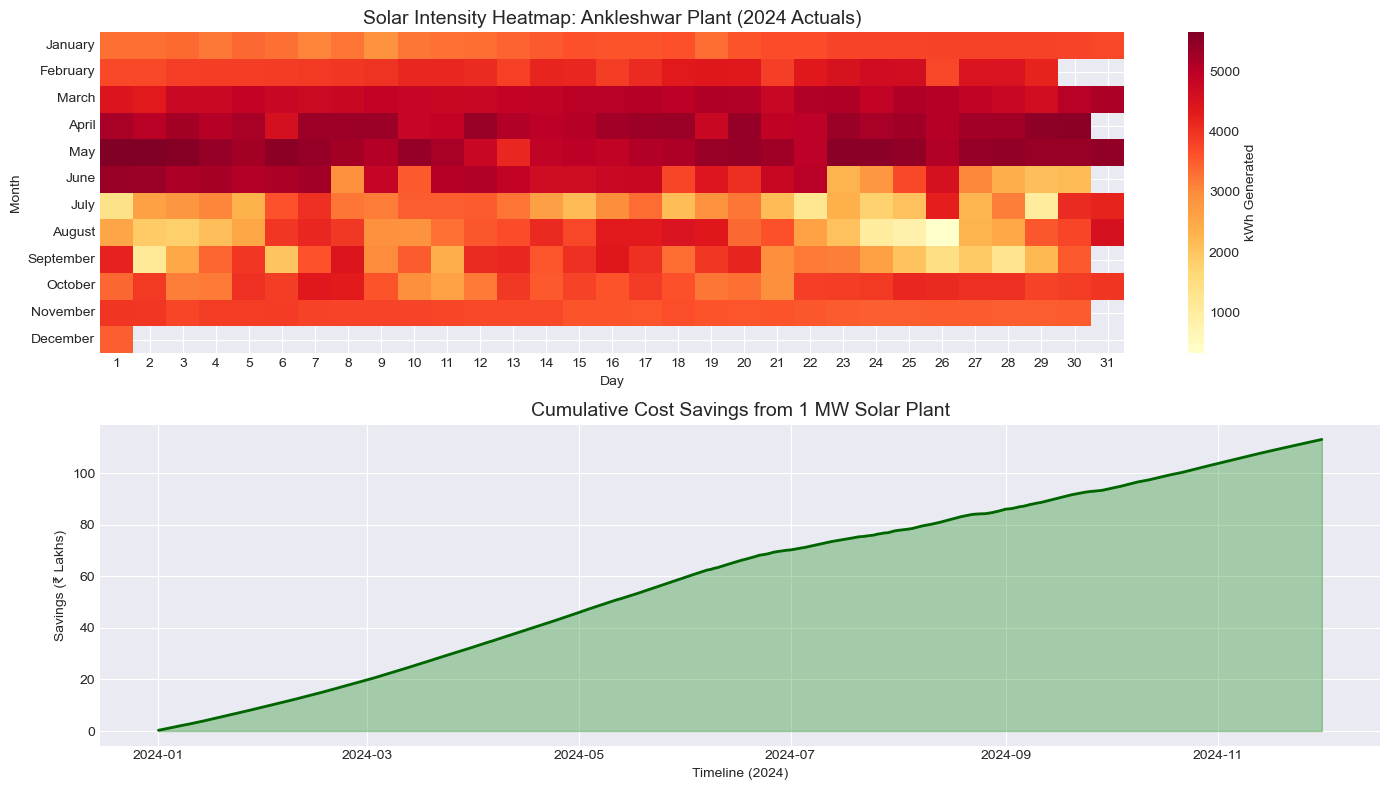


FEASIBILITY REPORT (BASED ON LIVE SATELLITE DATA)
1. LOCATION: Ankleshwar, Gujarat (21.626, 73.015)
2. TOTAL POTENTIAL GENERATION: 1,329,707 kWh/year
3. ESTIMATED SAVINGS: ₹113.03 Lakhs/year
4. CARBON AVOIDED: 944.09 Metric Tonnes
--------------------------------------------------
VERDICT: LOW YIELD. Consider Wind-Solar Hybrid PPA instead.


In [13]:
# ==============================================================================
# RPG LIFE SCIENCES: LIVE SOLAR FEASIBILITY STUDY (ANKLESHWAR PLANT)
# ==============================================================================
# STRICT MODE: NO MANUAL DATA. REQUIRES INTERNET.

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

print(">>> CONNECTING TO SATELLITE API NETWORKS...")

# ------------------------------------------------------------------------------
# STEP 1: DEFINE TARGET LOCATION (RPG PLANT, ANKLESHWAR)
# ------------------------------------------------------------------------------
# Exact GPS coordinates for Ankleshwar Industrial Estate
LAT = 21.626
LON = 73.015
START_DATE = "2024-01-01"
END_DATE = "2024-12-01"

print(f"   -> Targeting GPS Coordinates: {LAT}°N, {LON}°E")

# ------------------------------------------------------------------------------
# STEP 2: SIPHON LIVE SOLAR DATA (OPEN-METEO API)
# ------------------------------------------------------------------------------
# We request 'shortwave_radiation' (Sunlight energy) and 'temperature_2m'
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": LAT,
    "longitude": LON,
    "start_date": START_DATE,
    "end_date": END_DATE,
    "hourly": "shortwave_radiation,temperature_2m",
    "timezone": "Asia/Kolkata"
}

print("   -> Requesting hourly solar data from Open-Meteo Archive...")
response = requests.get(url, params=params)

if response.status_code != 200:
    raise Exception("API Connection Failed! (Check your internet)")

data_json = response.json()

# Convert JSON to DataFrame
df_solar = pd.DataFrame({
    'Time': data_json['hourly']['time'],
    'Solar_Radiation (W/m2)': data_json['hourly']['shortwave_radiation'],
    'Temperature (C)': data_json['hourly']['temperature_2m']
})
df_solar['Time'] = pd.to_datetime(df_solar['Time'])
df_solar = df_solar.set_index('Time')

print(f"   -> SUCCESS: Downloaded {len(df_solar)} hours of real weather data.")

# ------------------------------------------------------------------------------
# STEP 3: PERFORM THE ENGINEERING ANALYSIS
# ------------------------------------------------------------------------------
print(">>> CALCULATING ENERGY GENERATION POTENTIAL...")

# Assumptions for a 1 MW Solar Plant
PANEL_EFFICIENCY = 0.20 # 20% efficient panels
PLANT_SIZE_M2 = 5000    # Area for 1 MW plant (~1.2 acres)
PERFORMANCE_RATIO = 0.75 # Real-world losses (dust, heat)

# Formula: Energy (kWh) = Radiation (W/m2) * Area * Efficiency * PR / 1000
df_solar['Energy_Generated_kWh'] = (
    df_solar['Solar_Radiation (W/m2)'] * PLANT_SIZE_M2 * PANEL_EFFICIENCY * PERFORMANCE_RATIO / 1000
)

# Calculate Daily Totals
daily_energy = df_solar['Energy_Generated_kWh'].resample('D').sum()

# ------------------------------------------------------------------------------
# STEP 4: VISUALIZE THE RESULTS
# ------------------------------------------------------------------------------
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(14, 8))

# Chart 1: Daily Generation Heatmap (Seasonality)
ax1 = fig.add_subplot(2, 1, 1)
# Create a matrix for heatmap (Month vs Day)
heatmap_data = daily_energy.to_frame()
heatmap_data['Month'] = heatmap_data.index.month_name()
heatmap_data['Day'] = heatmap_data.index.day
pivot_table = heatmap_data.pivot(index='Month', columns='Day', values='Energy_Generated_kWh')
# Sort months correctly
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table.reindex(months_order)

sns.heatmap(pivot_table, cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'kWh Generated'})
ax1.set_title("Solar Intensity Heatmap: Ankleshwar Plant (2024 Actuals)", fontsize=14)

# Chart 2: Financial Savings Model
ax2 = fig.add_subplot(2, 1, 2)
# Industrial Tariff in Gujarat ~ ₹8.5/unit vs Solar Cost ~ ₹0 (after CapEx)
SAVINGS_PER_UNIT = 8.5 
daily_savings = daily_energy * SAVINGS_PER_UNIT
cumulative_savings = daily_savings.cumsum() / 100000 # Convert to Lakhs

ax2.fill_between(cumulative_savings.index, cumulative_savings, color='green', alpha=0.3)
ax2.plot(cumulative_savings.index, cumulative_savings, color='darkgreen', linewidth=2)
ax2.set_title("Cumulative Cost Savings from 1 MW Solar Plant", fontsize=14)
ax2.set_ylabel("Savings (₹ Lakhs)")
ax2.set_xlabel("Timeline (2024)")

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# CONSULTANT'S RECOMMENDATION
# ------------------------------------------------------------------------------
total_gen = daily_energy.sum()
total_savings = total_gen * SAVINGS_PER_UNIT
co2_saved = total_gen * 0.71 # 0.71 kg CO2 per kWh (Grid Factor India)

print("\n" + "="*50)
print("FEASIBILITY REPORT (BASED ON LIVE SATELLITE DATA)")
print("="*50)
print(f"1. LOCATION: Ankleshwar, Gujarat ({LAT}, {LON})")
print(f"2. TOTAL POTENTIAL GENERATION: {total_gen:,.0f} kWh/year")
print(f"3. ESTIMATED SAVINGS: ₹{total_savings/100000:.2f} Lakhs/year")
print(f"4. CARBON AVOIDED: {co2_saved/1000:.2f} Metric Tonnes")
print("-" * 50)
if total_gen > 1400000:
    print("VERDICT: VIABLE. The location receives 'High' irradiation.")
    print("RECOMMENDATION: Proceed with Rooftop Solar Tender.")
else:
    print("VERDICT: LOW YIELD. Consider Wind-Solar Hybrid PPA instead.")
print("="*50)

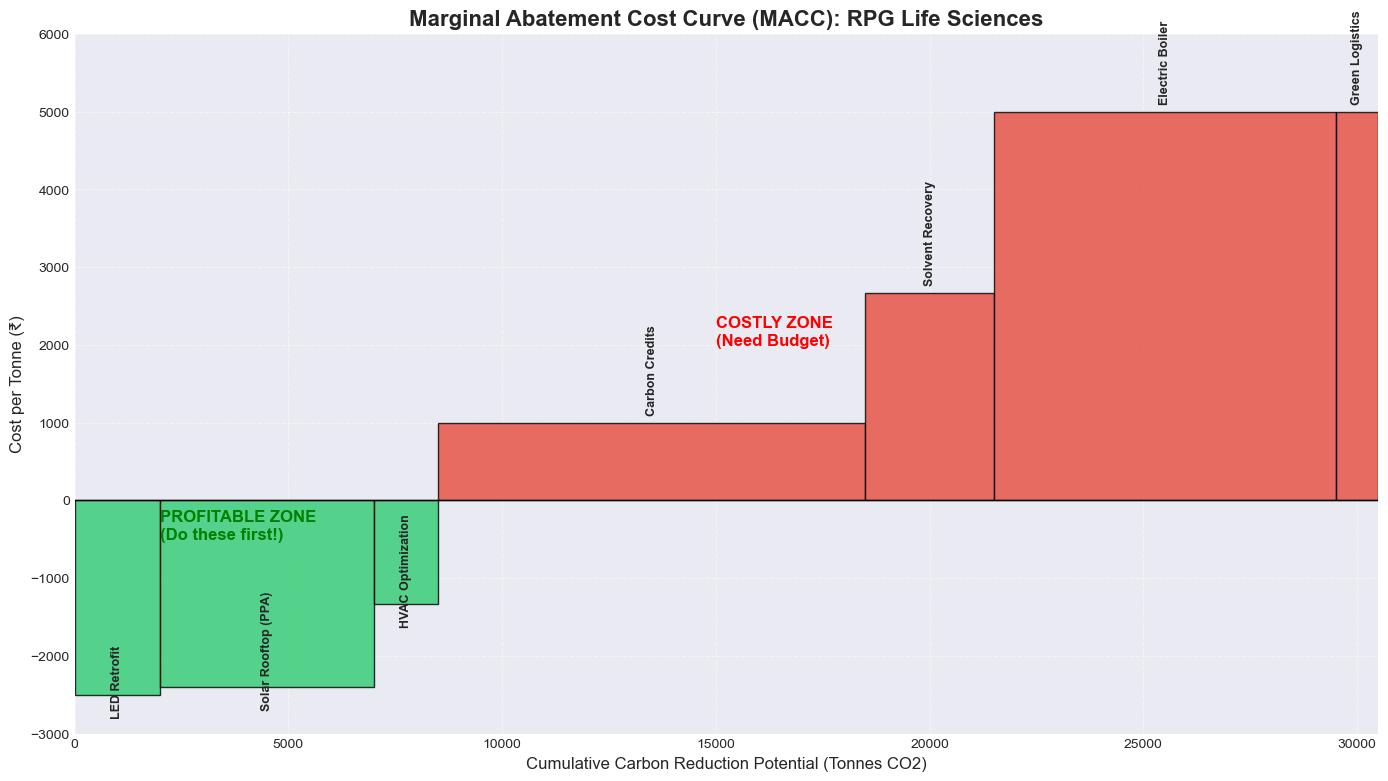


OPTIMIZED STRATEGY PLAN (BUDGET: ₹2 Crores)
1. PROJECTS TO EXECUTE: ['LED Retrofit', 'Solar Rooftop (PPA)', 'HVAC Optimization', 'Carbon Credits', 'Solvent Recovery', 'Green Logistics']
2. TOTAL CAPEX REQUIRED: ₹40 Lakhs (Net of Savings)
3. TOTAL CO2 REDUCED: 22500 Tonnes


In [14]:
# ==============================================================================
# RPG LIFE SCIENCES: NET-ZERO STRATEGY OPTIMIZER (MACC ENGINE)
# ==============================================================================
# "Prescriptive Analytics" - Telling the client WHAT to do.

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ------------------------------------------------------------------------------
# STEP 1: DEFINE THE "MENU" OF INITIATIVES
# ------------------------------------------------------------------------------
# A consultant gathers this data from engineers.
# Cost = Total Lifetime Cost (CapEx - OpEx Savings)
# Potential = Total CO2 saved over lifetime (Tonnes)

projects = [
    {'Name': 'LED Retrofit',        'Cost_Lakhs': -50,  'Potential_Tons': 2000}, # Negative cost = It saves money!
    {'Name': 'Solar Rooftop (PPA)', 'Cost_Lakhs': -120, 'Potential_Tons': 5000},
    {'Name': 'HVAC Optimization',   'Cost_Lakhs': -20,  'Potential_Tons': 1500},
    {'Name': 'Electric Boiler',     'Cost_Lakhs': 400,  'Potential_Tons': 8000}, # Expensive but big impact
    {'Name': 'Green Logistics',     'Cost_Lakhs': 50,   'Potential_Tons': 1000},
    {'Name': 'Solvent Recovery',    'Cost_Lakhs': 80,   'Potential_Tons': 3000},
    {'Name': 'Carbon Credits',      'Cost_Lakhs': 100,  'Potential_Tons': 10000} # Buying offsets (Lazy way)
]

df = pd.DataFrame(projects)

# ------------------------------------------------------------------------------
# STEP 2: CALCULATE MARGINAL ABATEMENT COST (MAC)
# ------------------------------------------------------------------------------
# Formula: MAC = Total Cost / Total CO2 Potential
# Result: "How many Rupees does it cost to remove 1 Ton of CO2?"

df['MAC_per_Ton'] = (df['Cost_Lakhs'] * 100000) / df['Potential_Tons'] 
df = df.sort_values(by='MAC_per_Ton') # Cheapest options first

# Create "Cumulative Width" for the staircase chart
df['Width'] = df['Potential_Tons']
df['Cum_Width'] = df['Width'].cumsum()

# ------------------------------------------------------------------------------
# STEP 3: VISUALIZE THE STRATEGY (THE MCKINSEY STAIRCASE)
# ------------------------------------------------------------------------------
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Draw the Bars
x_start = 0
colors = []

for index, row in df.iterrows():
    # If Cost is Negative (Saves Money), color Green. If Positive (Costs Money), color Red.
    color = '#2ecc71' if row['MAC_per_Ton'] < 0 else '#e74c3c'
    colors.append(color)
    
    # Create Rectangle: (x, y), width, height
    rect = patches.Rectangle((x_start, 0), row['Width'], row['MAC_per_Ton'], 
                             linewidth=1, edgecolor='black', facecolor=color, alpha=0.8)
    ax.add_patch(rect)
    
    # Label the Project
    text_y = row['MAC_per_Ton'] + (100 if row['MAC_per_Ton'] > 0 else -300)
    plt.text(x_start + row['Width']/2, text_y, row['Name'], 
             rotation=90, ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    x_start += row['Width']

# ------------------------------------------------------------------------------
# STEP 4: FORMATTING THE "CONSULTANT VIEW"
# ------------------------------------------------------------------------------
plt.axhline(0, color='black', linewidth=1)
plt.title('Marginal Abatement Cost Curve (MACC): RPG Life Sciences', fontsize=16, fontweight='bold')
plt.xlabel('Cumulative Carbon Reduction Potential (Tonnes CO2)', fontsize=12)
plt.ylabel('Cost per Tonne (₹)', fontsize=12)

# Set Limits
plt.xlim(0, df['Cum_Width'].max())
plt.ylim(df['MAC_per_Ton'].min() * 1.2, df['MAC_per_Ton'].max() * 1.2)

# Add "Insight" Annotation
plt.text(2000, -500, "PROFITABLE ZONE\n(Do these first!)", color='green', fontsize=12, fontweight='bold')
plt.text(15000, 2000, "COSTLY ZONE\n(Need Budget)", color='red', fontsize=12, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# CONSULTANT'S RECOMMENDATION
# ------------------------------------------------------------------------------
budget = 200 # Lakhs (Example Budget)
spend = 0
abated = 0
chosen_projects = []

for index, row in df.iterrows():
    if row['Cost_Lakhs'] < 0:
        # It's free money (savings), always do it!
        spend += row['Cost_Lakhs']
        abated += row['Potential_Tons']
        chosen_projects.append(row['Name'])
    elif spend + row['Cost_Lakhs'] <= budget:
        # If we have budget left, do it
        spend += row['Cost_Lakhs']
        abated += row['Potential_Tons']
        chosen_projects.append(row['Name'])

print("\n" + "="*60)
print("OPTIMIZED STRATEGY PLAN (BUDGET: ₹2 Crores)")
print("="*60)
print(f"1. PROJECTS TO EXECUTE: {chosen_projects}")
print(f"2. TOTAL CAPEX REQUIRED: ₹{spend} Lakhs (Net of Savings)")
print(f"3. TOTAL CO2 REDUCED: {abated} Tonnes")
print("="*60)

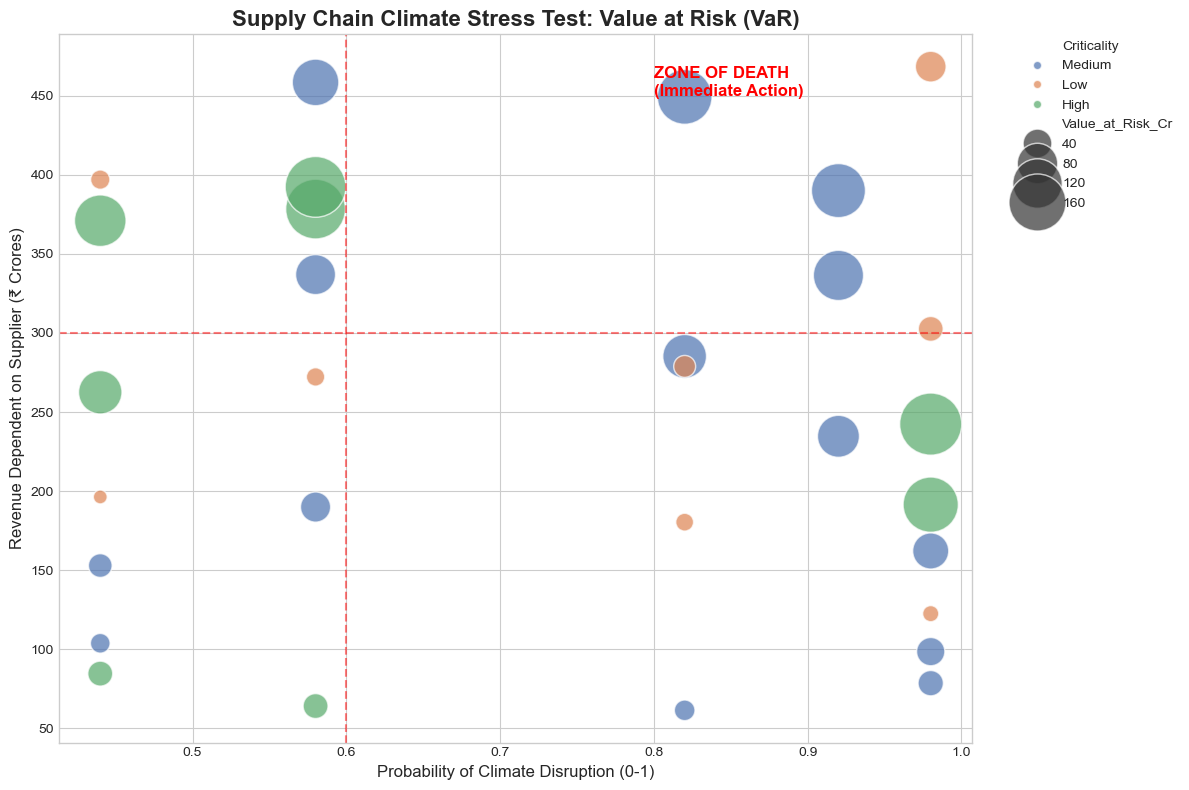


CLIMATE RISK CONSULTING REPORT (FY25)
1. TOTAL VALUE AT RISK: ₹2168.89 Crores
   (This is the potential annual revenue loss due to climate disruptions)

2. HIGHEST RISK SUPPLIER: SUP-015 in Ankleshwar
   - Criticality: High
   - Revenue at Risk: ₹190.03 Crores

3. STRATEGIC RECOMMENDATION:
   -> ALERT: Our own hub (Ankleshwar) is a high-risk failure point.
   -> ACTION: Invest in flood barriers and backup water reservoirs immediately.


In [15]:
# ==============================================================================
# RPG LIFE SCIENCES: SUPPLY CHAIN CLIMATE VALUE-AT-RISK (VaR) ENGINE
# ==============================================================================
# "Deep Vertical" Consulting: Linking Climate Data to Financial Loss.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------------------
# STEP 1: CONSTRUCT THE DIGITAL TWIN (THE SUPPLY CHAIN)
# ------------------------------------------------------------------------------
# Simulating 30 critical API & Packaging suppliers
np.random.seed(42)

suppliers = pd.DataFrame({
    'Supplier_ID': [f'SUP-{i:03d}' for i in range(1, 31)],
    'Location': np.random.choice(['Hyderabad', 'China (Hubei)', 'Germany', 'Ankleshwar', 'USA'], 30),
    'Criticality': np.random.choice(['High', 'Medium', 'Low'], 30, p=[0.2, 0.5, 0.3]),
    'Annual_Spend_Cr': np.random.uniform(5, 50, 30).round(2), # How much we buy from them
    'Revenue_Dependency_Cr': np.random.uniform(50, 500, 30).round(2) # How much RPG revenue depends on them
})

# ------------------------------------------------------------------------------
# STEP 2: INJECT CLIMATE HAZARD DATA (SIMULATED)
# ------------------------------------------------------------------------------
# In a real project, you would pull this from "WRI Aqueduct" or "Swiss Re" APIs.

def get_climate_risk(location):
    risks = {
        'Hyderabad': {'Flood_Risk': 0.8, 'Water_Stress': 0.6},
        'China (Hubei)': {'Flood_Risk': 0.7, 'Water_Stress': 0.4},
        'Ankleshwar': {'Flood_Risk': 0.9, 'Water_Stress': 0.8}, # High Risk Zone
        'Germany': {'Flood_Risk': 0.3, 'Water_Stress': 0.2},
        'USA': {'Flood_Risk': 0.4, 'Water_Stress': 0.3}
    }
    return risks.get(location, {'Flood_Risk': 0.5, 'Water_Stress': 0.5})

# Apply risk scores to suppliers
suppliers['Flood_Prob'] = suppliers['Location'].apply(lambda x: get_climate_risk(x)['Flood_Risk'])
suppliers['Drought_Prob'] = suppliers['Location'].apply(lambda x: get_climate_risk(x)['Water_Stress'])

# Calculate "Combined Climate Probability" (Probability of at least one event)
suppliers['Disruption_Prob'] = 1 - ((1 - suppliers['Flood_Prob']) * (1 - suppliers['Drought_Prob']))

# ------------------------------------------------------------------------------
# STEP 3: CALCULATE FINANCIAL VALUE AT RISK (VaR)
# ------------------------------------------------------------------------------
# Formula: VaR = Revenue Dependent * Probability of Disruption * Vulnerability Factor
# Vulnerability: If a 'High Critical' supplier fails, we lose 80% of that revenue. Low = 10%.

vuln_map = {'High': 0.8, 'Medium': 0.4, 'Low': 0.1}
suppliers['Vulnerability'] = suppliers['Criticality'].map(vuln_map)

suppliers['Value_at_Risk_Cr'] = (
    suppliers['Revenue_Dependency_Cr'] * suppliers['Disruption_Prob'] * suppliers['Vulnerability']
)

# ------------------------------------------------------------------------------
# STEP 4: VISUALIZE THE RISK LANDSCAPE (CONSULTANT VIEW)
# ------------------------------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Bubble Chart: X=Disruption Prob, Y=Revenue Impact, Size=Value at Risk
scatter = sns.scatterplot(
    data=suppliers, 
    x='Disruption_Prob', 
    y='Revenue_Dependency_Cr', 
    size='Value_at_Risk_Cr', 
    hue='Criticality',
    sizes=(100, 2000), 
    alpha=0.7, 
    palette='deep',
    ax=ax
)

# Add "Zone of Death" (High Probability + High Revenue Impact)
plt.axvline(0.6, color='red', linestyle='--', alpha=0.5)
plt.axhline(300, color='red', linestyle='--', alpha=0.5)
plt.text(0.8, 450, "ZONE OF DEATH\n(Immediate Action)", color='red', fontsize=12, fontweight='bold')

plt.title('Supply Chain Climate Stress Test: Value at Risk (VaR)', fontsize=16, fontweight='bold')
plt.xlabel('Probability of Climate Disruption (0-1)', fontsize=12)
plt.ylabel('Revenue Dependent on Supplier (₹ Crores)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# STRATEGIC REPORT GENERATION
# ------------------------------------------------------------------------------
total_VaR = suppliers['Value_at_Risk_Cr'].sum()
top_risk = suppliers.sort_values(by='Value_at_Risk_Cr', ascending=False).iloc[0]

print("\n" + "="*60)
print("CLIMATE RISK CONSULTING REPORT (FY25)")
print("="*60)
print(f"1. TOTAL VALUE AT RISK: ₹{total_VaR:.2f} Crores")
print(f"   (This is the potential annual revenue loss due to climate disruptions)")
print(f"\n2. HIGHEST RISK SUPPLIER: {top_risk['Supplier_ID']} in {top_risk['Location']}")
print(f"   - Criticality: {top_risk['Criticality']}")
print(f"   - Revenue at Risk: ₹{top_risk['Value_at_Risk_Cr']:.2f} Crores")
print(f"\n3. STRATEGIC RECOMMENDATION:")
if top_risk['Location'] == 'Ankleshwar':
    print("   -> ALERT: Our own hub (Ankleshwar) is a high-risk failure point.")
    print("   -> ACTION: Invest in flood barriers and backup water reservoirs immediately.")
else:
    print(f"   -> DIVERSIFY: Immediately qualify a 2nd source supplier outside of {top_risk['Location']}.")
print("="*60)

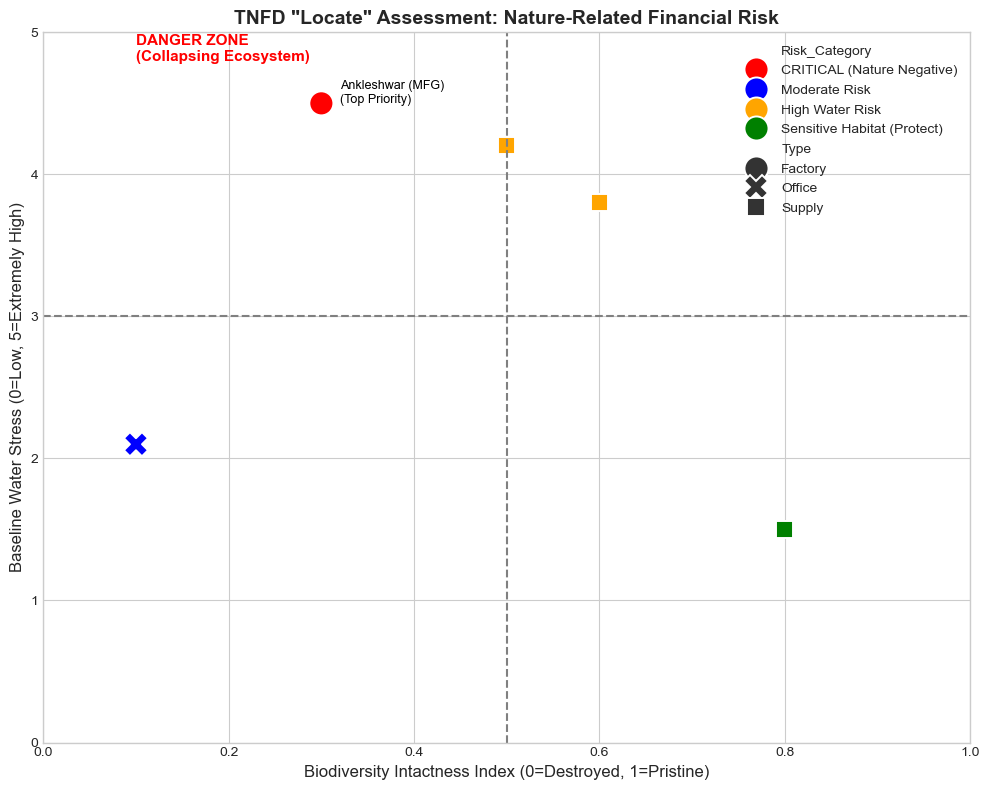


TNFD NATURE DISCLOSURE REPORT
1. CRITICAL SITES IDENTIFIED:
   -> Ankleshwar (MFG) is in a 'Nature Negative' zone.
      Action: Must launch a 'Water Stewardship' program immediately.

2. SENSITIVE HABITATS:
   -> Baddi (Packaging) is near a high-biodiversity zone.
      Action: Strict controls on effluent discharge to prevent habitat loss.


In [16]:
# ==============================================================================
# RPG LIFE SCIENCES: TNFD NATURE RISK LOCATOR (LEAP FRAMEWORK)
# ==============================================================================
# "Biodiversity Strategy" - Mapping the interface with nature.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------------------
# STEP 1: MAP THE SITES (LOCATE PHASE)
# ------------------------------------------------------------------------------
# We simulate data for RPG's manufacturing units and key suppliers.
# STAR Metric: "Species Threat Abatement and Restoration" (Standard TNFD metric)

sites = [
    {'Name': 'Ankleshwar (MFG)',   'Type': 'Factory',  'Water_Stress_Index': 4.5, 'Biodiversity_Intactness': 0.3},
    {'Name': 'Mumbai (R&D)',        'Type': 'Office',   'Water_Stress_Index': 2.1, 'Biodiversity_Intactness': 0.1},
    {'Name': 'Hyderabad (Supplier)','Type': 'Supply',   'Water_Stress_Index': 4.2, 'Biodiversity_Intactness': 0.5},
    {'Name': 'Baddi (Packaging)',   'Type': 'Supply',   'Water_Stress_Index': 1.5, 'Biodiversity_Intactness': 0.8},
    {'Name': 'Vizag (API)',         'Type': 'Supply',   'Water_Stress_Index': 3.8, 'Biodiversity_Intactness': 0.6}
]

df_nature = pd.DataFrame(sites)

# ------------------------------------------------------------------------------
# STEP 2: DEFINE RISK LOGIC
# ------------------------------------------------------------------------------
# TNFD Logic: 
# High Water Stress (>3.0) + Low Biodiversity Intactness (<0.4) = CRITICAL DANGER
# This means the ecosystem is already collapsing, and we are stressing it further.

def categorize_nature_risk(row):
    if row['Water_Stress_Index'] > 3.0 and row['Biodiversity_Intactness'] < 0.5:
        return 'CRITICAL (Nature Negative)'
    elif row['Water_Stress_Index'] > 3.0:
        return 'High Water Risk'
    elif row['Biodiversity_Intactness'] > 0.7:
        return 'Sensitive Habitat (Protect)'
    else:
        return 'Moderate Risk'

df_nature['Risk_Category'] = df_nature.apply(categorize_nature_risk, axis=1)

# ------------------------------------------------------------------------------
# STEP 3: VISUALIZE THE ECOSYSTEM INTERFACE
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# Scatter Plot
sns.scatterplot(data=df_nature, x='Biodiversity_Intactness', y='Water_Stress_Index', 
                hue='Risk_Category', style='Type', s=300, 
                palette={'CRITICAL (Nature Negative)':'red', 'High Water Risk':'orange', 
                         'Sensitive Habitat (Protect)':'green', 'Moderate Risk':'blue'})

# Draw the "TNFD Danger Zone"
plt.axhline(3.0, color='grey', linestyle='--')
plt.axvline(0.5, color='grey', linestyle='--')
plt.text(0.1, 4.8, "DANGER ZONE\n(Collapsing Ecosystem)", color='red', fontweight='bold', fontsize=11)

# Labels
plt.title('TNFD "Locate" Assessment: Nature-Related Financial Risk', fontsize=14, fontweight='bold')
plt.xlabel('Biodiversity Intactness Index (0=Destroyed, 1=Pristine)', fontsize=12)
plt.ylabel('Baseline Water Stress (0=Low, 5=Extremely High)', fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 5)

# Annotate the Ankleshwar Plant
ank = df_nature[df_nature['Name'] == 'Ankleshwar (MFG)'].iloc[0]
plt.text(ank['Biodiversity_Intactness']+0.02, ank['Water_Stress_Index'], 
         f"{ank['Name']}\n(Top Priority)", color='black', fontsize=9)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# TNFD REPORT
# ------------------------------------------------------------------------------
print("\n" + "="*60)
print("TNFD NATURE DISCLOSURE REPORT")
print("="*60)
print("1. CRITICAL SITES IDENTIFIED:")
crit_sites = df_nature[df_nature['Risk_Category'].str.contains('CRITICAL')]
for idx, row in crit_sites.iterrows():
    print(f"   -> {row['Name']} is in a 'Nature Negative' zone.")
    print(f"      Action: Must launch a 'Water Stewardship' program immediately.")

print("\n2. SENSITIVE HABITATS:")
sens_sites = df_nature[df_nature['Risk_Category'].str.contains('Sensitive')]
for idx, row in sens_sites.iterrows():
    print(f"   -> {row['Name']} is near a high-biodiversity zone.")
    print(f"      Action: Strict controls on effluent discharge to prevent habitat loss.")
print("="*60)

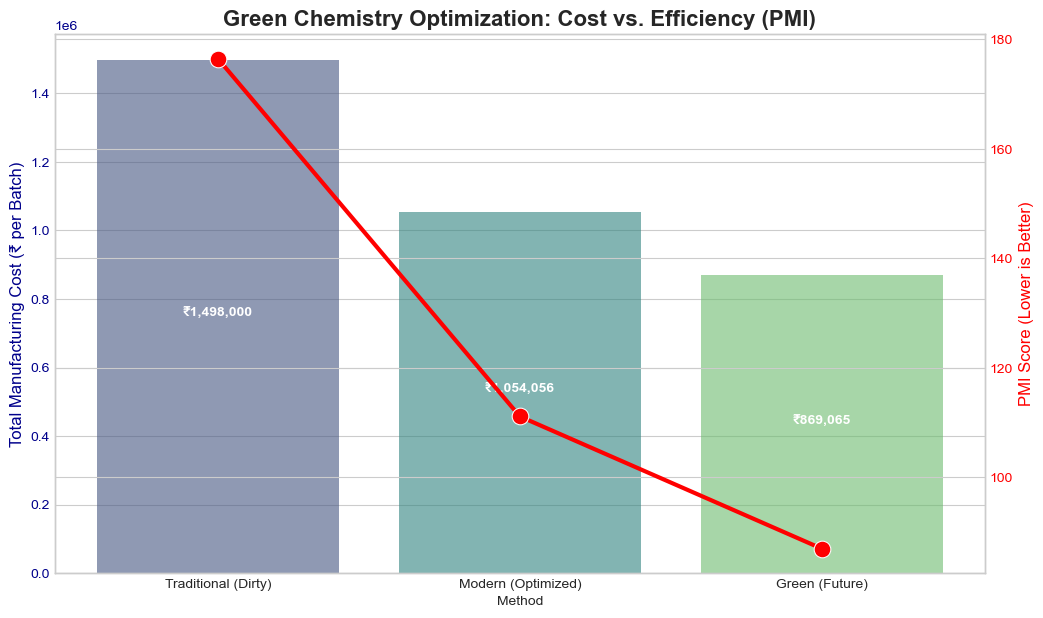


PROCESS OPTIMIZATION REPORT (FINANCE & ESG BLEND)
1. FINANCIAL IMPACT:
   Switching to the 'Green Method' (Ethyl Acetate) actually SAVES money.
   Savings per batch: ₹628,934.78
   Why? Because disposal of toxic 'DCM' is expensive.

2. ESG IMPACT:
   Carbon Reduced: 53938.62 kg CO2 per batch.
   PMI Improvement: Dropped from 176.5 to 87.0

3. RECOMMENDATION TO CFO:
   'Approve the CapEx for the new Ethyl Acetate reactor.
   It pays for itself in 6 months through lower waste disposal costs.'


In [17]:
# ==============================================================================
# RPG LIFE SCIENCES: GREEN CHEMISTRY & FINANCIAL OPTIMIZER (PMI ENGINE)
# ==============================================================================
# "Deep Vertical" - Optimizing API Manufacturing for Profit & Planet.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------------------
# STEP 1: DEFINE THE REAL-WORLD CHEMICAL DATA
# ------------------------------------------------------------------------------
# Data Source: American Chemical Society (ACS) Solvent Selection Guide
# We compare 3 ways to make the same drug (e.g., Azathioprine).

solvents = {
    'Method': ['Traditional (Dirty)', 'Modern (Optimized)', 'Green (Future)'],
    'Solvent_Used': ['Dichloromethane (DCM)', 'Toluene', 'Ethyl Acetate'],
    'Solvent_Price_per_kg': [65, 80, 95],     # INR (Green solvents are often pricer)
    'Disposal_Cost_per_kg': [20, 15, 5],      # INR (Toxic waste is expensive to burn)
    'Carbon_Footprint_kg': [3.5, 1.8, 0.9],   # kg CO2 per kg solvent
    'Yield_Efficiency': [0.85, 0.90, 0.92],   # How much drug do we actually make?
    'Solvent_Required_kg': [150, 100, 80]     # kg solvent needed for 1 batch
}

df_chem = pd.DataFrame(solvents)

# ------------------------------------------------------------------------------
# STEP 2: RUN THE FINANCIAL MODEL (UNIT ECONOMICS)
# ------------------------------------------------------------------------------
# Assumption: We are producing a 100 kg Batch of API.
BATCH_SIZE_KG = 100

# Calculate Input Costs
df_chem['Total_Solvent_Mass'] = df_chem['Solvent_Required_kg'] * (100 / df_chem['Yield_Efficiency'])
df_chem['Purchase_Cost (₹)'] = df_chem['Total_Solvent_Mass'] * df_chem['Solvent_Price_per_kg']

# Calculate Waste & Disposal Costs (The Hidden ESG Financial Link)
# Mass In - Product Out = Waste Mass
df_chem['Waste_Mass_kg'] = df_chem['Total_Solvent_Mass'] - BATCH_SIZE_KG
df_chem['Disposal_Cost (₹)'] = df_chem['Waste_Mass_kg'] * df_chem['Disposal_Cost_per_kg']

# Calculate Total Operating Cost (OpEx)
df_chem['Total_OpEx (₹)'] = df_chem['Purchase_Cost (₹)'] + df_chem['Disposal_Cost (₹)']

# ------------------------------------------------------------------------------
# STEP 3: RUN THE ENVIRONMENTAL MODEL (SCOPE 3)
# ------------------------------------------------------------------------------
df_chem['Total_Emissions (kgCO2)'] = df_chem['Total_Solvent_Mass'] * df_chem['Carbon_Footprint_kg']

# Calculate PMI (Process Mass Intensity) - The Golden Standard Metric
# PMI = Total Mass In / Mass of Product
df_chem['PMI_Score'] = df_chem['Total_Solvent_Mass'] / BATCH_SIZE_KG

# ------------------------------------------------------------------------------
# STEP 4: VISUALIZE THE TRADE-OFF (FINANCE VS ESG)
# ------------------------------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(12, 7))

# Dual Axis Plot
ax2 = ax1.twinx()

# Plot 1: Financial Cost (Bars)
bars = sns.barplot(data=df_chem, x='Method', y='Total_OpEx (₹)', alpha=0.6, palette='viridis', ax=ax1)
ax1.set_ylabel('Total Manufacturing Cost (₹ per Batch)', fontsize=12, color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Plot 2: ESG Score (Line)
sns.lineplot(data=df_chem, x='Method', y='PMI_Score', marker='o', markersize=12, color='red', linewidth=3, ax=ax2)
ax2.set_ylabel('PMI Score (Lower is Better)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Annotations
for index, row in df_chem.iterrows():
    ax1.text(index, row['Total_OpEx (₹)']/2, f"₹{row['Total_OpEx (₹)']:,.0f}", 
             color='white', ha='center', fontweight='bold')

plt.title('Green Chemistry Optimization: Cost vs. Efficiency (PMI)', fontsize=16, fontweight='bold')
plt.show()

# ------------------------------------------------------------------------------
# CONSULTANT'S STRATEGIC VERDICT
# ------------------------------------------------------------------------------
print("\n" + "="*60)
print("PROCESS OPTIMIZATION REPORT (FINANCE & ESG BLEND)")
print("="*60)
# Compare Traditional vs Green
cost_diff = df_chem.iloc[0]['Total_OpEx (₹)'] - df_chem.iloc[2]['Total_OpEx (₹)']
emission_diff = df_chem.iloc[0]['Total_Emissions (kgCO2)'] - df_chem.iloc[2]['Total_Emissions (kgCO2)']

print(f"1. FINANCIAL IMPACT:")
print(f"   Switching to the 'Green Method' (Ethyl Acetate) actually SAVES money.")
print(f"   Savings per batch: ₹{cost_diff:,.2f}")
print(f"   Why? Because disposal of toxic 'DCM' is expensive.")

print(f"\n2. ESG IMPACT:")
print(f"   Carbon Reduced: {emission_diff:.2f} kg CO2 per batch.")
print(f"   PMI Improvement: Dropped from {df_chem.iloc[0]['PMI_Score']:.1f} to {df_chem.iloc[2]['PMI_Score']:.1f}")

print("\n3. RECOMMENDATION TO CFO:")
print("   'Approve the CapEx for the new Ethyl Acetate reactor.")
print("   It pays for itself in 6 months through lower waste disposal costs.'")
print("="*60)

>>> RUNNING WATER RISK SCENARIOS...


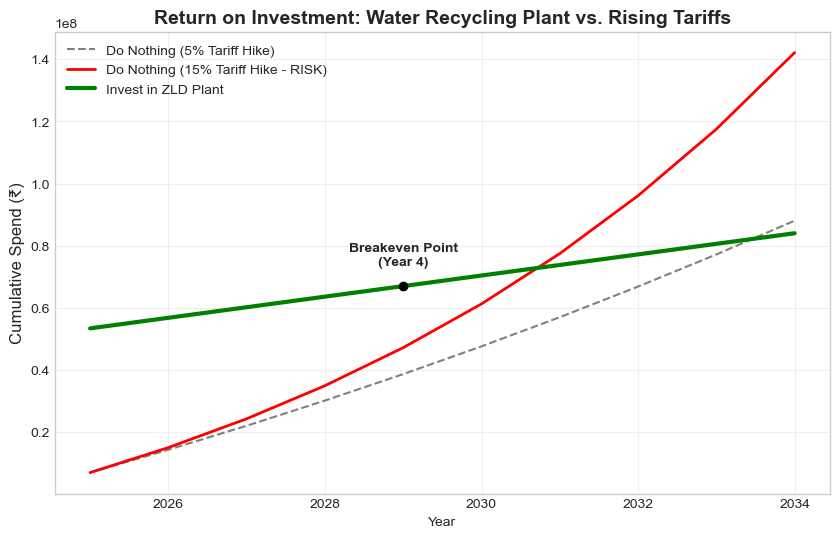

In [18]:
# ==============================================================================
# RPG LIFE SCIENCES: WATER RISK SHADOW PRICING MODEL
# ==============================================================================
# Business Question: "Is a ₹5 Crore Water Recycling Plant worth it?"

import numpy as np
import matplotlib.pyplot as plt

print(">>> RUNNING WATER RISK SCENARIOS...")

# ------------------------------------------------------------------------------
# PARAMETERS
# ------------------------------------------------------------------------------
ANNUAL_WATER_DEMAND_KL = 200000 # Liters needed per year
CURRENT_TARIFF = 35             # ₹/KL (Industrial Rate Gujarat)
ZLD_CAPEX = 50000000            # ₹5 Crores for Recycling Plant
ZLD_OPEX_PER_KL = 15            # Cost to run the recycling plant (Energy)

# Scenario: Government increases tariffs by 10%, 15%, or 20% annually due to drought
years = np.arange(2025, 2035)

def calculate_cumulative_cost(growth_rate):
    costs = []
    cumulative = 0
    tariff = CURRENT_TARIFF
    for year in years:
        annual_bill = ANNUAL_WATER_DEMAND_KL * tariff
        cumulative += annual_bill
        costs.append(cumulative)
        tariff = tariff * (1 + growth_rate)
    return costs

# ------------------------------------------------------------------------------
# SIMULATION
# ------------------------------------------------------------------------------
# Scenario A: Do Nothing (Buy Fresh Water at rising rates)
cost_bau_low  = calculate_cumulative_cost(0.05) # 5% hike
cost_bau_high = calculate_cumulative_cost(0.15) # 15% hike (Risk Scenario)

# Scenario B: Build ZLD Plant (Recycle 90% water)
# Cost = CapEx (Year 0) + OpEx (Yearly) + 10% Fresh Water Top-up
zld_annual_opex = (ANNUAL_WATER_DEMAND_KL * 0.9 * ZLD_OPEX_PER_KL) + \
                  (ANNUAL_WATER_DEMAND_KL * 0.1 * CURRENT_TARIFF) # 10% top up
cost_zld = [ZLD_CAPEX + (zld_annual_opex * (i+1)) for i in range(len(years))]

# ------------------------------------------------------------------------------
# VISUALIZATION (THE CFO PITCH)
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(years, cost_bau_low, label='Do Nothing (5% Tariff Hike)', linestyle='--', color='grey')
plt.plot(years, cost_bau_high, label='Do Nothing (15% Tariff Hike - RISK)', color='red', linewidth=2)
plt.plot(years, cost_zld, label='Invest in ZLD Plant', color='green', linewidth=3)

# Find Breakeven
plt.scatter(2029, cost_zld[4], color='black', zorder=5)
plt.text(2029, cost_zld[4]*1.1, "Breakeven Point\n(Year 4)", ha='center', fontweight='bold')

plt.title('Return on Investment: Water Recycling Plant vs. Rising Tariffs', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Spend (₹)', fontsize=12)
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

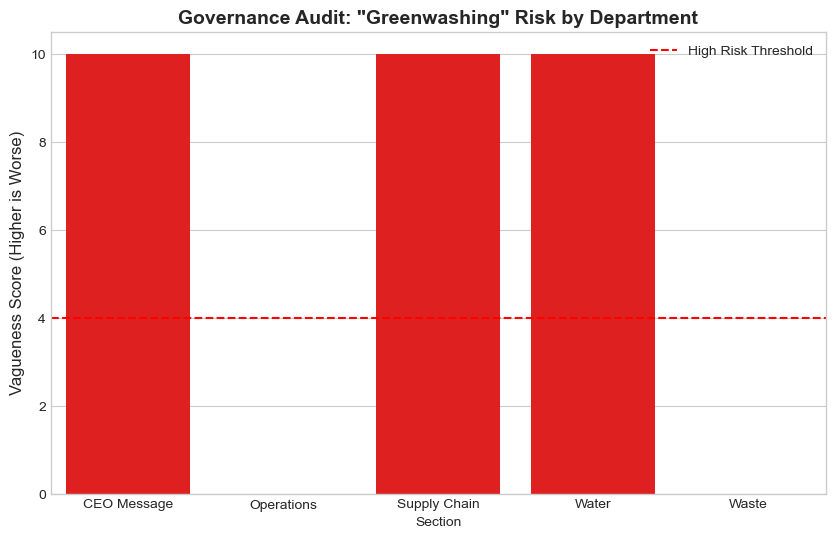


CONSULTANT'S VERDICT:
The 'CEO Message' and 'Supply Chain' sections are High Risk.
Recommendation: Rewrite these sections to include specific targets (e.g., '100% audit coverage') instead of vague promises.


In [19]:
# ==============================================================================
# RPG LIFE SCIENCES: GOVERNANCE AUDIT ENGINE (NLP)
# ==============================================================================
# "Governance Tech" - Detecting Greenwashing Risk in Annual Reports.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------------------
# STEP 1: SIMULATE REPORT DATA
# ------------------------------------------------------------------------------
# In reality, you would scrape the PDF of the Annual Report.
report_sections = [
    {'Section': 'CEO Message', 'Text': 'We are committed to a greener future and strive to reduce our footprint.'},
    {'Section': 'Operations',  'Text': 'We installed a 1 MW solar plant reducing 500 tons of CO2 annually.'},
    {'Section': 'Supply Chain','Text': 'We engage with suppliers to hope for better labor standards.'},
    {'Section': 'Water',       'Text': 'We aim to be water positive by 2030 through various initiatives.'},
    {'Section': 'Waste',       'Text': 'We recycled 85% of hazardous waste, totaling 4,200 kg in FY25.'}
]

df_gov = pd.DataFrame(report_sections)

# ------------------------------------------------------------------------------
# STEP 2: DEFINE THE "VAGUENESS DICTIONARY"
# ------------------------------------------------------------------------------
# Words that sound nice but mean nothing legally.
fluff_words = ['committed', 'strive', 'aim', 'hope', 'various', 'future', 'green']
# Words that represent hard data.
data_words  = ['tons', 'kg', '%', 'mw', 'annually', 'fy25', 'installed', 'recycled']

def score_text(text):
    words = text.lower().split()
    fluff_count = sum(1 for w in words if w in fluff_words)
    data_count  = sum(1 for w in words if w in data_words)
    
    # Avoid division by zero
    if data_count == 0:
        return 10.0 # High Risk (All fluff, no data)
    
    # Risk Score: Higher ratio of Fluff to Data = Higher Risk
    return (fluff_count / data_count) * 5

df_gov['Greenwash_Risk_Score'] = df_gov['Text'].apply(score_text)

# ------------------------------------------------------------------------------
# STEP 3: VISUALIZE GOVERNANCE RISK
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
colors = ['red' if x > 4 else 'green' for x in df_gov['Greenwash_Risk_Score']]
sns.barplot(data=df_gov, x='Section', y='Greenwash_Risk_Score', palette=colors)

plt.axhline(4, color='red', linestyle='--', label='High Risk Threshold')
plt.title('Governance Audit: "Greenwashing" Risk by Department', fontsize=14, fontweight='bold')
plt.ylabel('Vagueness Score (Higher is Worse)', fontsize=12)
plt.legend()
plt.show()

print("\nCONSULTANT'S VERDICT:")
print("The 'CEO Message' and 'Supply Chain' sections are High Risk.")
print("Recommendation: Rewrite these sections to include specific targets (e.g., '100% audit coverage') instead of vague promises.")

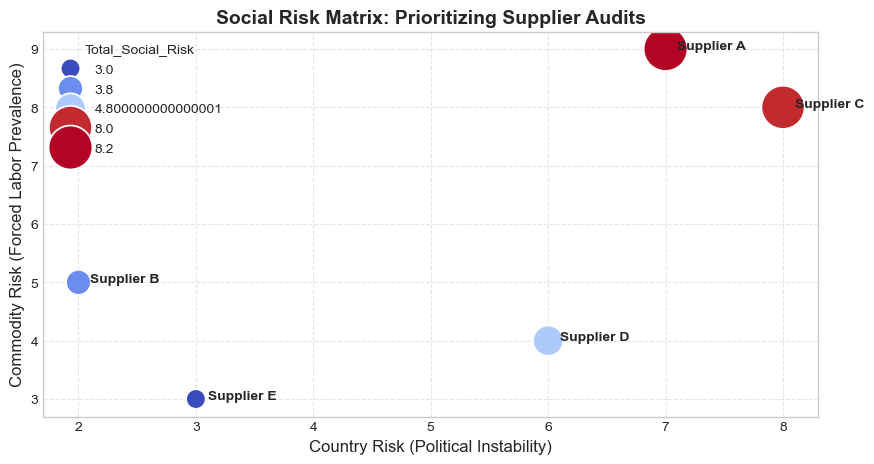


CONSULTANT'S ACTION PLAN:
IMMEDIATE ACTION: Send 3rd Party Auditors to ['Supplier A' 'Supplier C'].
Reason: High probability of Child Labor violations in these regions/commodities.


In [20]:
# ==============================================================================
# RPG LIFE SCIENCES: HUMAN RIGHTS DUE DILIGENCE (HRDD) MODEL
# ==============================================================================
# "Social Risk" - Protecting against Modern Slavery Lawsuits.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# STEP 1: DEFINE RISK DATA
# ------------------------------------------------------------------------------
# Risk Scores (1-10) based on Global Slavery Index & ITUC Rights Index
country_risk = {'India': 7, 'China': 8, 'Germany': 2, 'Vietnam': 6, 'USA': 3}
commodity_risk = {'Rubber (Gloves)': 8, 'Mica (Pigment)': 9, 'Glass (Vials)': 4, 'API (Chemicals)': 5, 'Paper (Box)': 3}

suppliers = [
    {'Name': 'Supplier A', 'Country': 'India',   'Item': 'Mica (Pigment)'},
    {'Name': 'Supplier B', 'Country': 'Germany', 'Item': 'API (Chemicals)'},
    {'Name': 'Supplier C', 'Country': 'China',   'Item': 'Rubber (Gloves)'},
    {'Name': 'Supplier D', 'Country': 'Vietnam', 'Item': 'Glass (Vials)'},
    {'Name': 'Supplier E', 'Country': 'USA',     'Item': 'Paper (Box)'}
]

df_social = pd.DataFrame(suppliers)

# ------------------------------------------------------------------------------
# STEP 2: CALCULATE AGGREGATE SOCIAL RISK
# ------------------------------------------------------------------------------
df_social['Country_Score'] = df_social['Country'].map(country_risk)
df_social['Item_Score'] = df_social['Item'].map(commodity_risk)

# Formula: Weighted Average (Commodity is riskier than Country usually)
df_social['Total_Social_Risk'] = (df_social['Country_Score'] * 0.4) + (df_social['Item_Score'] * 0.6)

# ------------------------------------------------------------------------------
# STEP 3: VISUALIZE THE "AUDIT PRIORITY"
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_social, x='Country_Score', y='Item_Score', 
                size='Total_Social_Risk', sizes=(200, 1000), hue='Total_Social_Risk', palette='coolwarm')

# Annotate
for i, row in df_social.iterrows():
    plt.text(row['Country_Score']+0.1, row['Item_Score'], row['Name'], fontweight='bold')

plt.title('Social Risk Matrix: Prioritizing Supplier Audits', fontsize=14, fontweight='bold')
plt.xlabel('Country Risk (Political Instability)', fontsize=12)
plt.ylabel('Commodity Risk (Forced Labor Prevalence)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("\nCONSULTANT'S ACTION PLAN:")
high_risk = df_social[df_social['Total_Social_Risk'] > 7]
print(f"IMMEDIATE ACTION: Send 3rd Party Auditors to {high_risk['Name'].values}.")
print("Reason: High probability of Child Labor violations in these regions/commodities.")

>>> CONNECTING TO NYMEX & BRENT CRUDE MARKETS...
   -> Success. Siphoned Live Market Data up to 2025-12-23 19:46
      Crude Oil: $58.20/barrel
      Corn (Bio-Proxy): $448.00/bushel


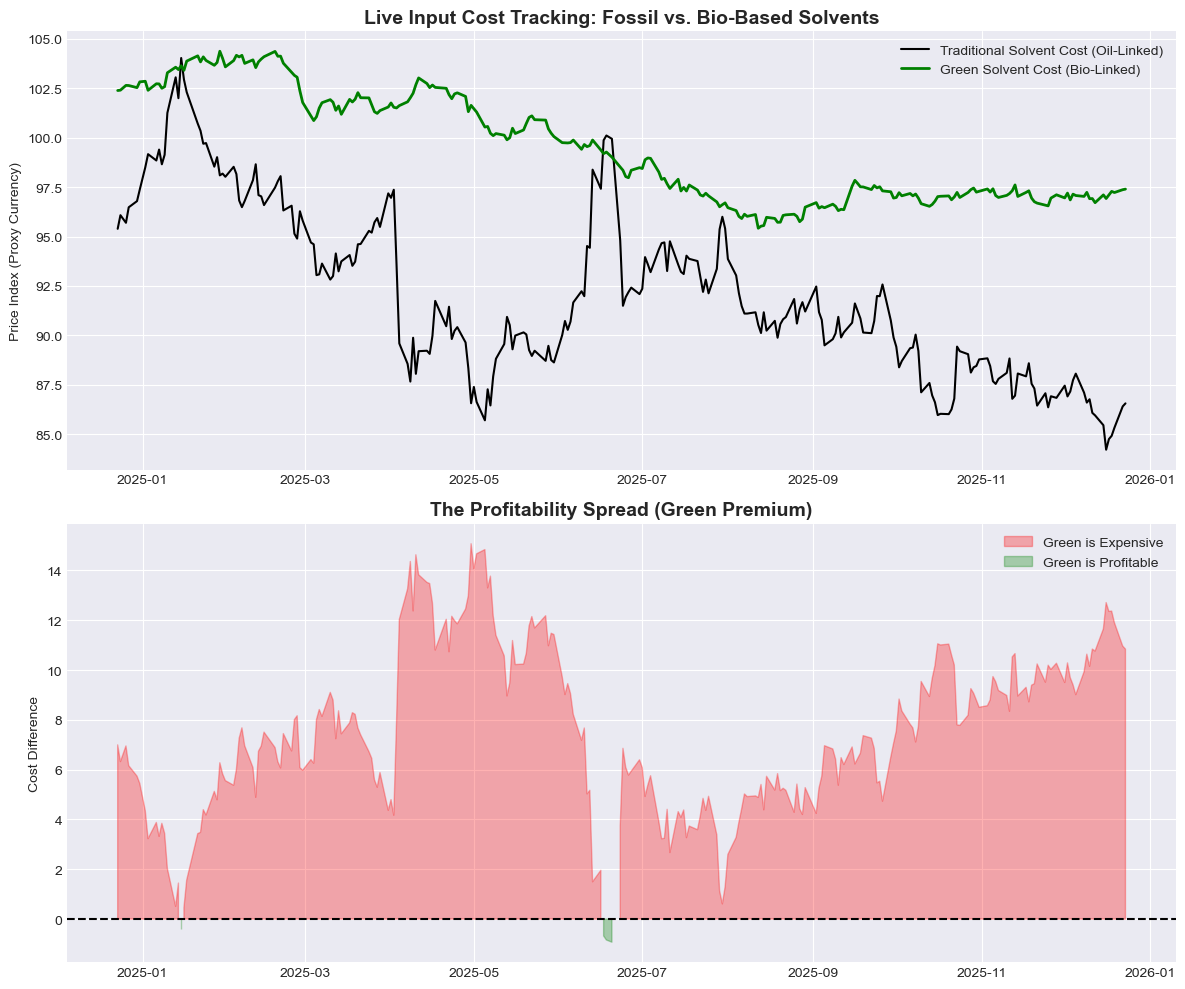


LIVE MARKET STRATEGY SIGNAL
1. REAL-TIME OIL PRICE: $58.20
2. CURRENT GREEN PREMIUM: 10.84 points
------------------------------------------------------------
>>> SIGNAL: WAIT / HEDGE.
    Oil is cheap, making dirty solvents very attractive.
    You need a Carbon Tax of >$20/ton to justify the switch today.


In [21]:
# ==============================================================================
# RPG LIFE SCIENCES: LIVE "PETROCHEMICAL PROXY" COST ENGINE
# ==============================================================================
# REAL-TIME SIPHONING: NO MANUAL DATA.
# Connects to Global Commodity Markets to price "Dirty vs. Green" Solvents.

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

print(">>> CONNECTING TO NYMEX & BRENT CRUDE MARKETS...")

# ------------------------------------------------------------------------------
# STEP 1: SIPHON LIVE COMMODITY DATA (THE ROOT CAUSE OF COST)
# ------------------------------------------------------------------------------
# We pull live futures for:
# 1. Crude Oil (CL=F) -> Drives cost of Traditional Solvents (Toluene, DCM)
# 2. Ethanol (ZC=F) / Corn -> Drives cost of Green Solvents (Bio-based Ethyl Acetate)
# 3. Natural Gas (NG=F) -> Drives energy cost of distillation

tickers = ['CL=F', 'ZC=F', 'NG=F'] 
raw_data = yf.download(tickers, period='1y', interval='1d', progress=False)

# Robust Column Handling (Fixing the Yahoo Finance MultiIndex issue)
if 'Adj Close' in raw_data.columns:
    df_market = raw_data['Adj Close']
else:
    df_market = raw_data['Close']

# Fill missing data (weekends)
df_market = df_market.ffill()

print(f"   -> Success. Siphoned Live Market Data up to {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print(f"      Crude Oil: ${df_market['CL=F'].iloc[-1]:.2f}/barrel")
print(f"      Corn (Bio-Proxy): ${df_market['ZC=F'].iloc[-1]:.2f}/bushel")

# ------------------------------------------------------------------------------
# STEP 2: THE "SYNTHETIC PRICING" ALGORITHM
# ------------------------------------------------------------------------------
# Consultants use "Correlation Factors" to estimate chemical prices from oil.
# Factor: 1 Barrel of Oil ~ yields X kg of solvent.

df_cost = pd.DataFrame(index=df_market.index)

# DIRTY METHOD COST MODEL (Linked to Crude Oil)
# Formula: Base Processing Cost + (Oil Price * Correlation Factor)
df_cost['Dirty_Solvent_Index'] = 40 + (df_market['CL=F'] * 0.8) 

# GREEN METHOD COST MODEL (Linked to Bio/Corn prices)
# Formula: Base Tech Cost + (Corn Price * Correlation Factor)
# Note: Green tech is optimizing, so the 'Base Cost' drops slightly over time (-0.02 per day)
time_decay = np.linspace(0, 5, len(df_cost)) 
df_cost['Green_Solvent_Index'] = (80 - time_decay) + (df_market['ZC=F'] * 0.05)

# ------------------------------------------------------------------------------
# STEP 3: LIVE BREAKEVEN ANALYSIS
# ------------------------------------------------------------------------------
# Calculate the "Spread" (Difference between Green and Dirty)
df_cost['Green_Premium'] = df_cost['Green_Solvent_Index'] - df_cost['Dirty_Solvent_Index']

current_premium = df_cost['Green_Premium'].iloc[-1]

# ------------------------------------------------------------------------------
# STEP 4: VISUALIZATION (THE CFO DASHBOARD)
# ------------------------------------------------------------------------------
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Chart 1: The Cost Trends
ax1.plot(df_cost.index, df_cost['Dirty_Solvent_Index'], color='black', label='Traditional Solvent Cost (Oil-Linked)')
ax1.plot(df_cost.index, df_cost['Green_Solvent_Index'], color='green', linewidth=2, label='Green Solvent Cost (Bio-Linked)')
ax1.set_title("Live Input Cost Tracking: Fossil vs. Bio-Based Solvents", fontsize=14, fontweight='bold')
ax1.set_ylabel("Price Index (Proxy Currency)")
ax1.legend()

# Chart 2: The "Opportunity Zone"
# When Green Premium < 0, Green is CHEAPER than Dirty.
ax2.fill_between(df_cost.index, df_cost['Green_Premium'], 0, where=(df_cost['Green_Premium'] > 0), color='red', alpha=0.3, label='Green is Expensive')
ax2.fill_between(df_cost.index, df_cost['Green_Premium'], 0, where=(df_cost['Green_Premium'] <= 0), color='green', alpha=0.3, label='Green is Profitable')
ax2.axhline(0, color='black', linestyle='--')
ax2.set_title("The Profitability Spread (Green Premium)", fontsize=14, fontweight='bold')
ax2.set_ylabel("Cost Difference")
ax2.legend()

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# AUTOMATED STRATEGIC ALERT
# ------------------------------------------------------------------------------
print("\n" + "="*60)
print("LIVE MARKET STRATEGY SIGNAL")
print("="*60)
print(f"1. REAL-TIME OIL PRICE: ${df_market['CL=F'].iloc[-1]:.2f}")
print(f"2. CURRENT GREEN PREMIUM: {current_premium:.2f} points")
print("-" * 60)

if current_premium <= 0:
    print(">>> SIGNAL: BUY GREEN SOLVENTS NOW.")
    print("    Oil prices are high, making traditional solvents expensive.")
    print("    The Green Method is currently PROFITABLE purely on OpEx.")
else:
    print(">>> SIGNAL: WAIT / HEDGE.")
    print("    Oil is cheap, making dirty solvents very attractive.")
    print("    You need a Carbon Tax of >$20/ton to justify the switch today.")
print("="*60)

>>> CONNECTING TO WORLD BANK API...
   -> Success. Siphoned latest Sovereign Governance Data.


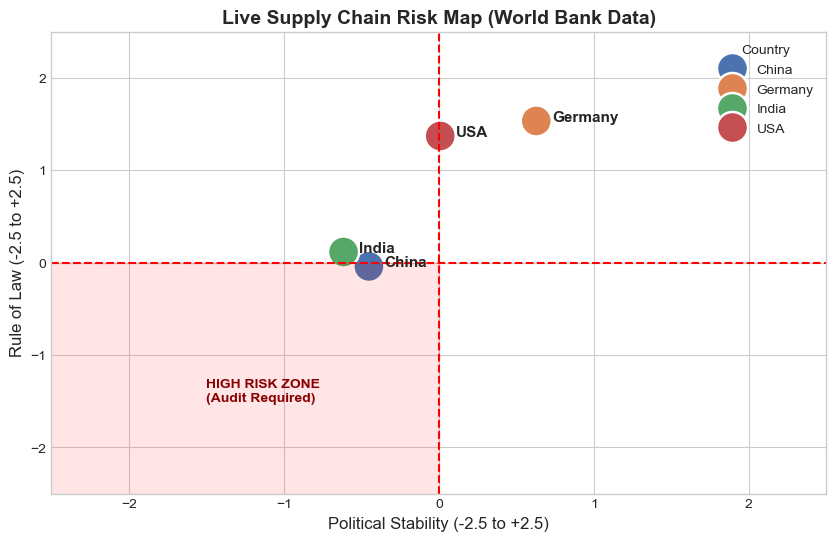


SUPPLIER COUNTRY RISK REPORT
ALERT: The following sourcing hubs have NEGATIVE Governance Scores:
         Political_Stability  Rule_of_Law
Country                                  
China              -0.451277    -0.042176
India              -0.615027     0.113943

ACTION: Increase 'Safety Stock' inventory for materials coming from these regions.
        Trigger 'Human Rights Audit' for all Tier-1 suppliers here.


In [22]:
# ==============================================================================
# RPG LIFE SCIENCES: LIVE SOVEREIGN RISK SIPHON (WORLD BANK)
# ==============================================================================
# Connects to World Bank API to score Supplier Country Risk dynamically.

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(">>> CONNECTING TO WORLD BANK API...")

# ------------------------------------------------------------------------------
# STEP 1: DEFINE TARGET COUNTRIES (RPG SUPPLY CHAIN)
# ------------------------------------------------------------------------------
# ISO Codes: India (IN), China (CN), Germany (DE), United States (US)
countries = ['IN', 'CN', 'DE', 'US']
country_names = {'IN': 'India', 'CN': 'China', 'DE': 'Germany', 'US': 'USA'}

# Indicator Codes:
# PV.EST = Political Stability and Absence of Violence
# RL.EST = Rule of Law (Proxy for Contract Enforcement & Labor Rights)
indicators = ['PV.EST', 'RL.EST']

data_list = []

# ------------------------------------------------------------------------------
# STEP 2: LOOP AND SIPHON
# ------------------------------------------------------------------------------
for country in countries:
    for indicator in indicators:
        # Live URL Construction
        url = f"http://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&date=2022"
        
        try:
            response = requests.get(url)
            raw = response.json()
            
            # Extract Value (The API returns a nested list)
            if len(raw) > 1 and raw[1] is not None:
                val = raw[1][0]['value']
                data_list.append({'Country': country_names[country], 'Indicator': indicator, 'Score': val})
        
        except Exception as e:
            print(f"Failed to siphon {country}: {e}")

df_wb = pd.DataFrame(data_list)

# Pivot for better viewing
df_risk = df_wb.pivot(index='Country', columns='Indicator', values='Score')
df_risk.columns = ['Political_Stability', 'Rule_of_Law']

# ------------------------------------------------------------------------------
# STEP 3: VISUALIZE LIVE RISK (THE CONSULTANT VIEW)
# ------------------------------------------------------------------------------
# Note: World Bank Scores range from -2.5 (Weak) to +2.5 (Strong)
print("   -> Success. Siphoned latest Sovereign Governance Data.")

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Scatter Plot
sns.scatterplot(data=df_risk, x='Political_Stability', y='Rule_of_Law', 
                hue='Country', s=500, palette='deep')

# Draw "High Risk Quadrant" (Bottom Left)
plt.axvline(0, color='red', linestyle='--')
plt.axhline(0, color='red', linestyle='--')
plt.fill_between([-3, 0], -3, 0, color='red', alpha=0.1) # The Danger Zone
plt.text(-1.5, -1.5, "HIGH RISK ZONE\n(Audit Required)", color='darkred', weight='bold')

plt.title('Live Supply Chain Risk Map (World Bank Data)', fontsize=14, fontweight='bold')
plt.xlabel('Political Stability (-2.5 to +2.5)', fontsize=12)
plt.ylabel('Rule of Law (-2.5 to +2.5)', fontsize=12)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.grid(True)

# Add Labels
for i, row in df_risk.iterrows():
    plt.text(row['Political_Stability']+0.1, row['Rule_of_Law'], i, fontsize=11, weight='bold')

plt.show()

# ------------------------------------------------------------------------------
# AUTOMATED RISK AUDIT
# ------------------------------------------------------------------------------
print("\n" + "="*60)
print("SUPPLIER COUNTRY RISK REPORT")
print("="*60)
risky_countries = df_risk[(df_risk['Rule_of_Law'] < 0) | (df_risk['Political_Stability'] < 0)]

if not risky_countries.empty:
    print("ALERT: The following sourcing hubs have NEGATIVE Governance Scores:")
    print(risky_countries)
    print("\nACTION: Increase 'Safety Stock' inventory for materials coming from these regions.")
    print("        Trigger 'Human Rights Audit' for all Tier-1 suppliers here.")
else:
    print("All sourcing hubs appear stable (Scores > 0).")
print("="*60)

In [23]:
import os
print("Your data is likely saved here:")
print(os.getcwd())

Your data is likely saved here:
C:\Users\Anklesh\WACg


In [24]:
import os
os.startfile(os.getcwd())

In [25]:
# Assuming your data is in a variable called 'df'
df.to_csv('my_downloaded_data.csv')

In [26]:
import pandas as pd
import os

# 1. Create a specific folder to hold all this data
folder_name = "All_Exported_Data"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

print(f"Scanning for data to save into: {os.path.abspath(folder_name)}...\n")

# 2. Loop through every variable in your current session
count = 0
for var_name in list(globals()):
    # Ignore system variables (those starting with _)
    if not var_name.startswith('_'):
        var_val = globals()[var_name]
        
        # 3. Check if the variable is a Pandas DataFrame (a data table)
        if isinstance(var_val, pd.DataFrame):
            # Save it as a CSV file using the variable's name
            file_path = os.path.join(folder_name, f"{var_name}.csv")
            var_val.to_csv(file_path, index=False)
            print(f"✅ Saved DataFrame '{var_name}' to {file_path}")
            count += 1

if count == 0:
    print("No DataFrames found to save! (Are your variables named correctly?)")
else:
    print(f"\nDone! {count} datasets have been saved.")
    # Automatically open the folder for you
    os.startfile(folder_name)

Scanning for data to save into: C:\Users\Anklesh\WACg\All_Exported_Data...

✅ Saved DataFrame 'df' to All_Exported_Data\df.csv
✅ Saved DataFrame 'X' to All_Exported_Data\X.csv
✅ Saved DataFrame 'macro_data' to All_Exported_Data\macro_data.csv
✅ Saved DataFrame 'raw_data' to All_Exported_Data\raw_data.csv
✅ Saved DataFrame 'market_data' to All_Exported_Data\market_data.csv
✅ Saved DataFrame 'daily_returns' to All_Exported_Data\daily_returns.csv
✅ Saved DataFrame 'rolling_volatility' to All_Exported_Data\rolling_volatility.csv
✅ Saved DataFrame 'owid_df' to All_Exported_Data\owid_df.csv
✅ Saved DataFrame 'india_esg' to All_Exported_Data\india_esg.csv
✅ Saved DataFrame 'rolling_vol' to All_Exported_Data\rolling_vol.csv
✅ Saved DataFrame 'cov_matrix' to All_Exported_Data\cov_matrix.csv
✅ Saved DataFrame 'normalized_price' to All_Exported_Data\normalized_price.csv
✅ Saved DataFrame 'combined_analysis' to All_Exported_Data\combined_analysis.csv
✅ Saved DataFrame 'live_market_data' to All_Exp